# Incident Management System

## Problem Statement:

A corp ABC is facing huge loss as finding difficulty handling the incident in time. Using Machine Learning we need to build a model where when we get an incident we are able to predict how long will it take for the incident to be closed with accuracy. Also to be able to predict if we will meet the given SLA or not. 

## Project Outcome:

The aim of the project is to be able to efficiently predict time taken for an incident to be resolved. By doing so we can plan our resources wisely for the incident type, and at the same time imrpove customers experience.

## Industry Review:



## Data Set Domain:

## Data Dictionary:

## Preprocessing/ Data Cleaning:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Importing data:

In [4]:
# data=pd.read_csv("/content/drive/My Drive/CAPSTONE/incident_event_log.csv")
data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### Understanding Data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [7]:
print(f"Number of rows : {data.shape[0]}")
print(f"Number of columns : {data.shape[1]}")

Number of rows : 141712
Number of columns : 36


#### Duplicate values: 

In [18]:
# checking for any duplicate rows
print(f"Number of duplicate rows: {np.sum([data.duplicated()])}")

Number of duplicate rows: 0


we dont seem to have any duplicate values in the dataset

#### Missing values:

dataset has a lot of `?` we need to replace those with NaN so we can deal with them easily.

In [32]:
# replacing `?` with NaN
data = data.replace('?', np.nan)

In [38]:
# missing values
def get_missing(df):
    """take dataframe as input and return missing count and missing percent of the dataset"""

    missing_df = df.isnull().sum().sort_values(ascending=False).reset_index()
    missing_df = missing_df.rename(columns = {'index': 'column_name', 0:'missing_count'})

    missing_df['missing_percent'] = np.round(missing_df['missing_count']/df.shape[0]*100,2)
    
    return missing_df

In [302]:
# get missing
get_missing(data).set_index('column_name')

,missing_count,missing_percent
column_name,,
caused_by,141689,99.98
vendor,141468,99.83
cmdb_ci,141267,99.69
rfc,140721,99.30
problem_id,139417,98.38
sys_created_at,53076,37.45
sys_created_by,53076,37.45
u_symptom,32964,23.26
assigned_to,27496,19.40


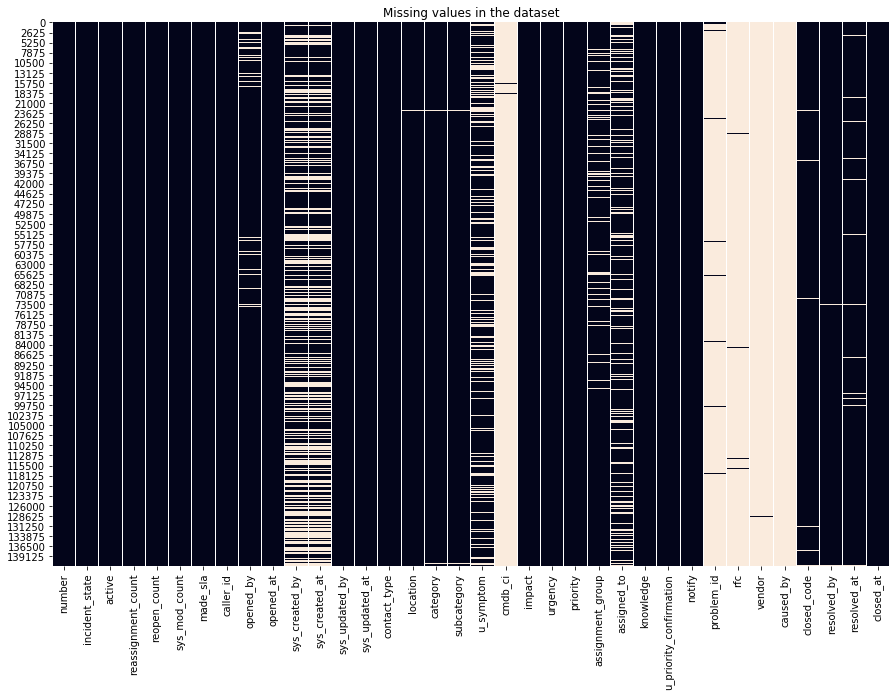

In [37]:
# checking missing data visually
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing values in the dataset")
plt.show()

**Inference:**    
    We have columns like `caused_by`, `vendor`, `cmdb_ci`, `rfc`, `problem_id` which have more than 95% of missing dataset. All these columns are actually very important however its possible the values are masked to maintain data security. Also as the columns might be unique as per the clients and their issues they might not be very useful for predicting target. hence removing the columns from the dataset.

#### Null treatment:

In [40]:
# removing columns which have more than 30% missing values
data1 = data.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id'],axis=1)

In [41]:
# checking missing values of the new data1
get_missing(data1)

,column_name,missing_count,missing_percent
0,sys_created_at,53076,37.45
1,sys_created_by,53076,37.45
2,u_symptom,32964,23.26
3,assigned_to,27496,19.40
4,assignment_group,14213,10.03
5,opened_by,4835,3.41
6,resolved_at,3141,2.22
7,closed_code,714,0.50
8,resolved_by,226,0.16
9,subcategory,111,0.08


In [42]:
# imputing categorical columns with mode
for i in ['u_symptom','assigned_to','assignment_group','opened_by','closed_code','resolved_by','subcategory','category','location','caller_id']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])
    

In [44]:
# resolved at is date column so its better to fill null values with forward filling
data1['resolved_at'].fillna(method='ffill', inplace=True)

In [53]:
# sys_created_at is almost close to opened_at column replacing values where sys_created_at == null with 'opened_at'
data1.loc[data1.sys_created_at.isnull(),'sys_created_at'] = data1.loc[data1.sys_created_at.isnull(),'opened_at']

In [60]:
# there is no way to predict the values for `sys_created_by` but we can probably use forward filling method for now as we dont want to miss out on any information
data1['sys_created_by'].fillna(method='ffill', inplace=True)


In [61]:
# checking missing percentage again
get_missing(data1)

,column_name,missing_count,missing_percent
0,closed_at,0,0.0
1,contact_type,0,0.0
2,incident_state,0,0.0
3,active,0,0.0
4,reassignment_count,0,0.0
5,reopen_count,0,0.0
6,sys_mod_count,0,0.0
7,made_sla,0,0.0
8,caller_id,0,0.0
9,opened_by,0,0.0


**Inference:**
    we have dealt with missing values by doing the required imputation, and there seem to be no missing values any more in any of the columns.

#### Understanding data types:

In [66]:
print(f"Data shape after null treatment : {data1.shape}")

print("Columns and their datatypes:")
data1.dtypes

Data shape after null treatment : (141712, 31)
Columns and their datatypes:


number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
closed_code                object
resolved_by                object
resolved_at   

**Inference:**
    We can see that date columns like `sys_created_at`, `opened_at`, `sys_updated_at`, `resolved_at` and `closed_at` are also listed as 'Object' datatype which is not accurate.

## Data Preprocessing: 

In [69]:
# here we see a lot of columns which are actually dates but not categories
dates = ['sys_created_at', 'opened_at', 'resolved_at', 'closed_at', 'sys_updated_at']

# updating datatype of the date columns

for feat in dates:
    data1[feat] = pd.to_datetime(data1[feat], format='%d/%m/%Y %H:%M')

In [70]:
# rechecking the datatypes
data1.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at             datetime64[ns]
sys_updated_by                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
assignment_group                   object
assigned_to                       

In [79]:
# lets get our numerical , categorical and datetime features separately
feat_num = data1.select_dtypes(np.number).columns.tolist()
print(f"Numerical columns : {len(feat_num)}\n{feat_num}\n")

# categorical and boolean features
feat_cat = data1.select_dtypes(['object', 'bool']).columns.tolist()
print(f"Categorical columns : {len(feat_cat)}\n{feat_cat}\n")      

# dates features
feat_dates = data1.select_dtypes(['datetime']).columns.tolist()
print(f"Datetime columns : {len(feat_dates)}\n{feat_dates}\n")      

Numerical columns : 3
['reassignment_count', 'reopen_count', 'sys_mod_count']

Categorical columns : 23
['number', 'incident_state', 'active', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by']

Datetime columns : 5
['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']



## Outliers:

In [91]:
# checking basic statistics of numerical features
data1[feat_num].describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


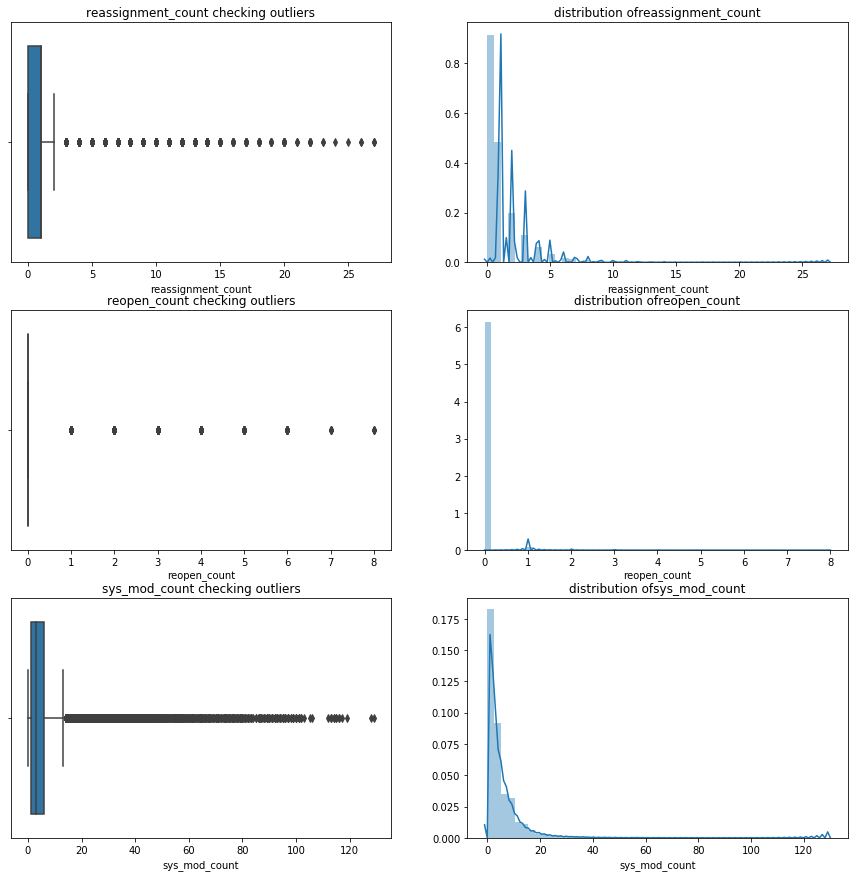

In [90]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

feat_ind = 0
for r in range(3):
    ax[r,0].set_title(feat_num[feat_ind]+' checking outliers')
    sns.boxplot(data1[feat_num[feat_ind]], ax = ax[r,0])
    
    ax[r,1].set_title('distribution of'+feat_num[feat_ind])
    sns.distplot(data1[feat_num[feat_ind]], ax =ax[r,1])
    
    feat_ind+=1

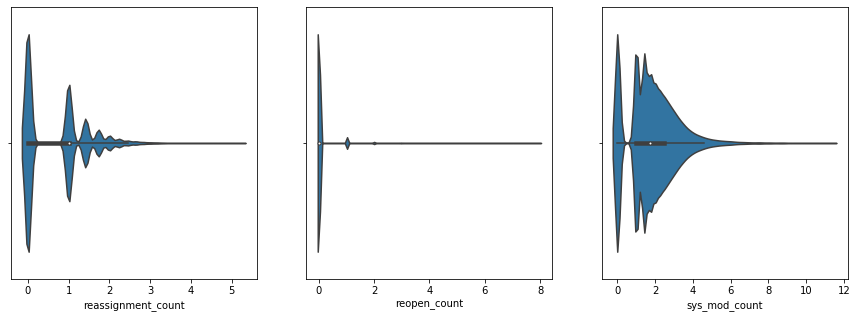

In [134]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

feat_ind=0
for c in range(3):
    sns.violinplot(data1[feat_num[feat_ind]], ax=ax[c])
    feat_ind+=1

**Inference:**
    We can see from the plots that 
    - `reassignment_count` : we have values from 0-27 however majority values are between 0-3 and rest seem to be at much lesser count i.e outliers.
    - `reopen_count` : we have values ranging from 0-8 however majority values are of 0 however we have very few values ranging from 2-8.
    - `sys_mod_count` : we have values ranging from 0-129 where majority values are between 0-6 and we have very less frequency for sys_mod_count > 20. 

In [101]:
#checking outliers

def check_outliers(x):
    
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x,0.75)
    iqr = q3-q1 
    
    more_than_upperbound = np.sum(x>(q3+1.5*iqr))
    less_than_lowerbound = np.sum(x<(q1-1.5*iqr))
    
#     print(np.sum(x>(q3+1.5*iqr)))
    
    return [less_than_lowerbound, more_than_upperbound]



In [111]:

less_than_lowerbound = [check_outliers(data1[feat])[0] for feat in feat_num]
more_than_upperbound = [check_outliers(data1[feat])[1] for feat in feat_num]

df_outliers = pd.DataFrame({'columns': feat_num,
                  'less_than_lowerbound': less_than_lowerbound,
                  'more_than_upperbound': more_than_upperbound})

df_outliers['outlier_percent']= df['more_than_upperbound']/data.shape[0]
df_outliers


,columns,less_than_lowerbound,more_than_upperbound,outlier_percent
0,reassignment_count,0,19635,0.138556
1,reopen_count,0,2314,0.016329
2,sys_mod_count,0,10900,0.076917


**Inference:**
    If check outlier percent `reassignment_count`  has almost 13.8% outliers and `sys_mod_count` has almost 8% of data as outliers and capping them will affect the information, hence not capping the data.

### Transformation:

**Inference:** We are instead using transformation on `reassignment_count` and `sys_mod_count` to slightly normalize the data and leaving reopen_count as it is.

In [112]:
data1['reassignment_count'] = np.power(data1['reassignment_count'], 1/2)

data1['sys_mod_count'] = np.power(data1['sys_mod_count'], 1/2)


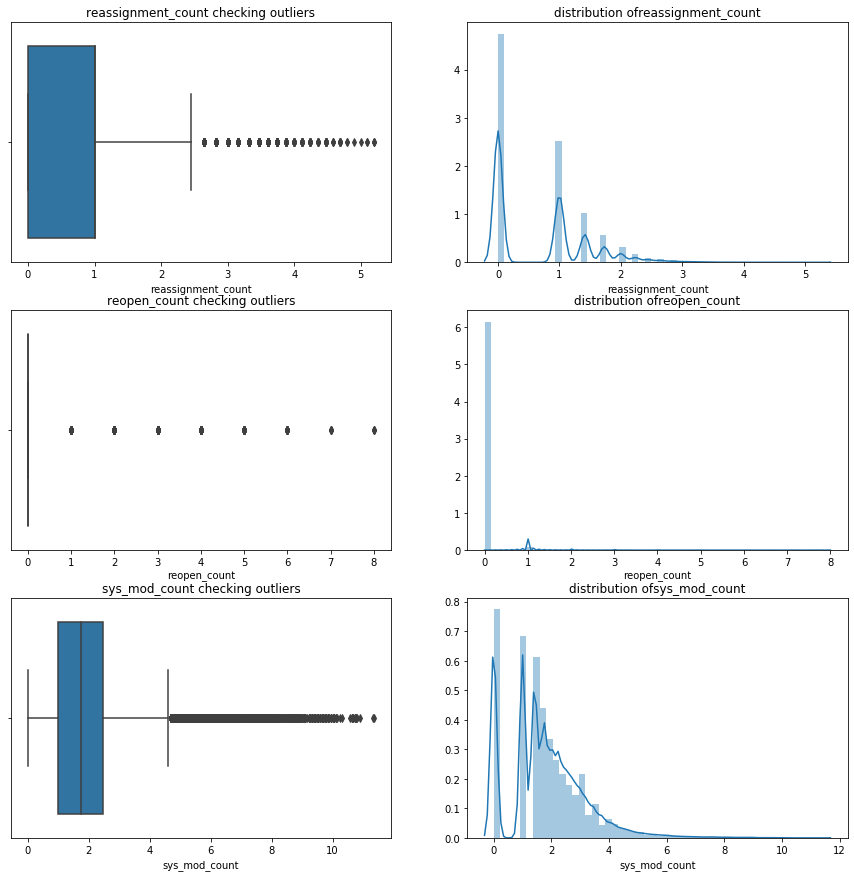

In [113]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

feat_ind = 0
for r in range(3):
    ax[r,0].set_title(feat_num[feat_ind]+' checking outliers')
    sns.boxplot(data1[feat_num[feat_ind]], ax = ax[r,0])
    
    ax[r,1].set_title('distribution of'+feat_num[feat_ind])
    sns.distplot(data1[feat_num[feat_ind]], ax =ax[r,1])
    
    feat_ind+=1

In [114]:

less_than_lowerbound = [check_outliers(data1[feat])[0] for feat in feat_num]
more_than_upperbound = [check_outliers(data1[feat])[1] for feat in feat_num]

df_outliers = pd.DataFrame({'columns': feat_num,
                  'less_than_lowerbound': less_than_lowerbound,
                  'more_than_upperbound': more_than_upperbound})

df_outliers['outlier_percent']= df['more_than_upperbound']/data.shape[0]
df_outliers


,columns,less_than_lowerbound,more_than_upperbound,outlier_percent
0,reassignment_count,0,2705,0.138556
1,reopen_count,0,2314,0.016329
2,sys_mod_count,0,4449,0.076917


## Feature Engineering:

In [115]:
# creating predicted_closed_days column to predict sla timeline
data1['predicted_closed_days']=(data1.closed_at- data1.opened_at).dt.total_seconds()/ (24 * 60 * 60)
data1['predicted_closed_days'].describe()

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [116]:
# separating opened_at column for days, month, time
data1['opened_month']=data1.opened_at.dt.month
data1['opened_day'] = data1.opened_at.dt.day
data1['opened_hour'] = data1.opened_at.dt.hour
data1['opened_minute'] = data1.opened_at.dt.minute

In [117]:
# separating sys_updated_at column for days, month, time
data1['sys_updated_month']=data1.sys_updated_at.dt.month
data1['sys_updated_day'] = data1.sys_updated_at.dt.day
data1['sys_updated_hour'] = data1.sys_updated_at.dt.hour
data1['sys_updated_minute'] = data1.sys_updated_at.dt.minute

## Univariate Analysis:

In [120]:
data1[feat_dates].describe()

,opened_at,sys_created_at,sys_updated_at,resolved_at,closed_at
count,141712,141712,141712,141712,141712
unique,19849,19559,50664,18505,2707
top,2016-04-14 20:42:00,2016-03-07 09:11:00,2016-03-24 18:40:00,2016-06-03 16:29:00,2016-03-24 18:59:00
freq,58,64,420,93,3324
first,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 01:23:00,2016-02-29 09:04:00,2016-02-29 17:47:00
last,2017-02-16 14:17:00,2017-02-16 14:17:00,2017-02-18 15:00:00,2017-02-17 00:47:00,2017-02-18 15:00:00


In [312]:
# opened_at distribution
df = data.copy()
df[['opened_at_date', 'opened_at_date_time']] = df['opened_at'].str.split(expand = True)

df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,opened_at_date,opened_at_date_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,29/2/2016,01:16
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,29/2/2016,01:16
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,29/2/2016,01:16
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,29/2/2016,01:16
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,29/2/2016,04:40


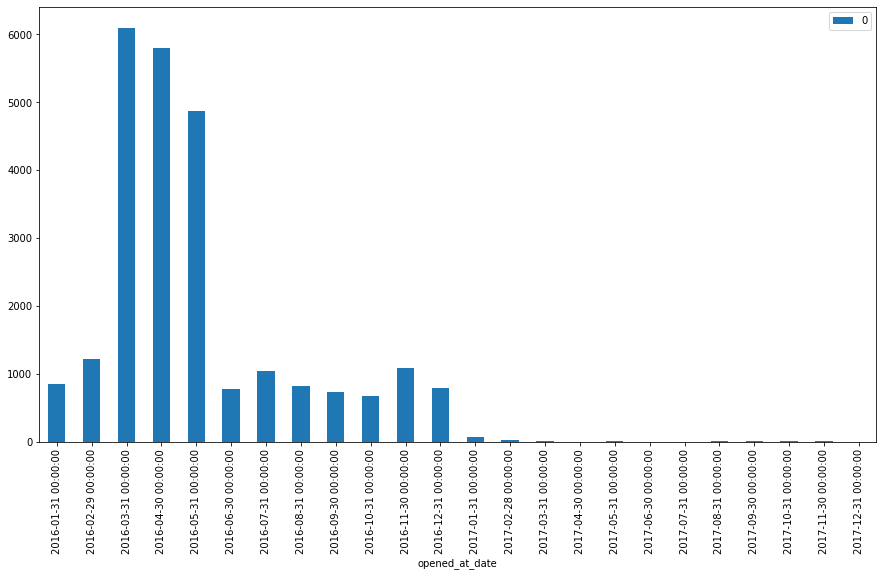

In [314]:
# df.head()
df['opened_at_date'] = pd.to_datetime(df.opened_at_date)
incidents_open_per_day = df.groupby(['number', 'opened_at_date']).size().reset_index().groupby('opened_at_date')[[0]].count()
incidents_open_per_month = incidents_open_per_day.groupby(pd.Grouper(freq="M")).sum()

incidents_open_per_month.plot(kind = 'bar', figsize =(15,8))
plt.show()
df[['closed_at_date', 'closed_at_date_time']] = df['closed_at'].str.split(expand = True)
df.head()
df['closed_at_date'] = pd.to_datetime(df.opened_at_date)


**Inference:**
    Checking  distribution of opened dates we can see we have more number of incidents for 1st of the year and maximum number of cases for months March-May

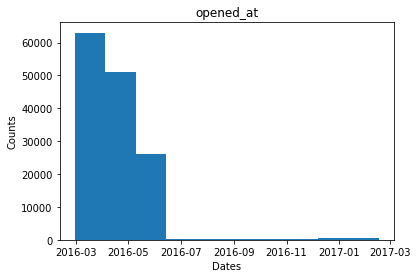

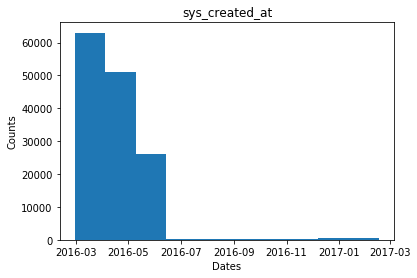

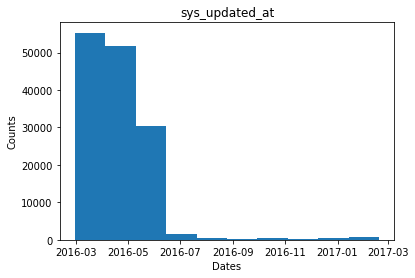

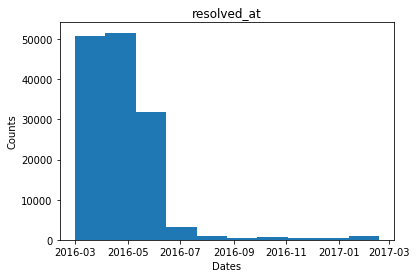

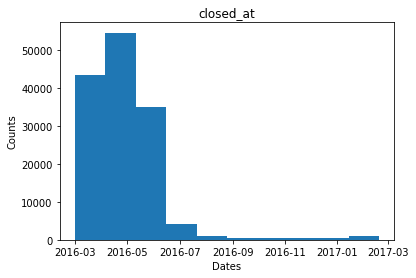

In [127]:
for feat in feat_dates:
    plt.title(feat)
    plt.hist(data1[feat])
    plt.xlabel("Dates")
    plt.ylabel("Counts")
    plt.show()

**Inference:**
    - `opened_at` : has values starting from 29/02/2016 1:16am to 16/02/2017 2.15am, however majority data is for dates between 03-2016 to 06/2016.
    - `sys_created_at` : has values starting in similar range as opened_at only there seems to be few minutes difference but distribution is almost same
    - `sys_updated_at` : has values starting from 29/02/2016 1:23am to 16/02/2017 3am also majority updates happened in 04/2016
    - `resolved_at` : has values starting from 29/02/2016 9:04am to 16/02/2017 12:47pm also majority cases were resolved in 06/2016
    - `closed_at` : has values starting from 29/02/2016 5:47pm to 18/02/2017 3pm also majority cases seem to be closed in 03/2016.
            

*Note: There is a significant difference between resolved and closed time. sometimes also day this could be because the ticket might seem to be resolved by the technician however problem might actually not been solved.*
    - 

#### Checking categorical features:

In [166]:
# checking categories and their value_counts
for feat in feat_cat:
    print(f"Number of unique categories in {feat} is {data1[feat].nunique()}")

Number of unique categories in number is 24918
Number of unique categories in incident_state is 9
Number of unique categories in active is 2
Number of unique categories in made_sla is 2
Number of unique categories in caller_id is 5244
Number of unique categories in opened_by is 207
Number of unique categories in sys_created_by is 185
Number of unique categories in sys_updated_by is 846
Number of unique categories in contact_type is 5
Number of unique categories in location is 224
Number of unique categories in category is 58
Number of unique categories in subcategory is 254
Number of unique categories in u_symptom is 525
Number of unique categories in impact is 3
Number of unique categories in urgency is 3
Number of unique categories in priority is 4
Number of unique categories in assignment_group is 78
Number of unique categories in assigned_to is 234
Number of unique categories in knowledge is 2
Number of unique categories in u_priority_confirmation is 2
Number of unique categories i

In [168]:
# counting unique values per categorical column
data1[feat_cat].nunique().sort_values(ascending=False)

number                     24918
caller_id                   5244
sys_updated_by               846
u_symptom                    525
subcategory                  254
assigned_to                  234
location                     224
resolved_by                  216
opened_by                    207
sys_created_by               185
assignment_group              78
category                      58
closed_code                   17
incident_state                 9
contact_type                   5
priority                       4
urgency                        3
impact                         3
knowledge                      2
u_priority_confirmation        2
notify                         2
made_sla                       2
active                         2
dtype: int64

**Inference:**
    We can see we have few categories which are just too many like number, caller_id, and most of them having more than 100 categories.
    
    - `number` seems like a redundant column and has a lot of unique values, however we can see these are unique incident_numbers and few incidents are more than 1

### Distribution of categories:

In [173]:
feat_category = data1[feat_cat].nunique()[data1[feat_cat].nunique()<=100].index.tolist()
feat_others = data1[feat_cat].nunique()[data1[feat_cat].nunique()>100].index.tolist()

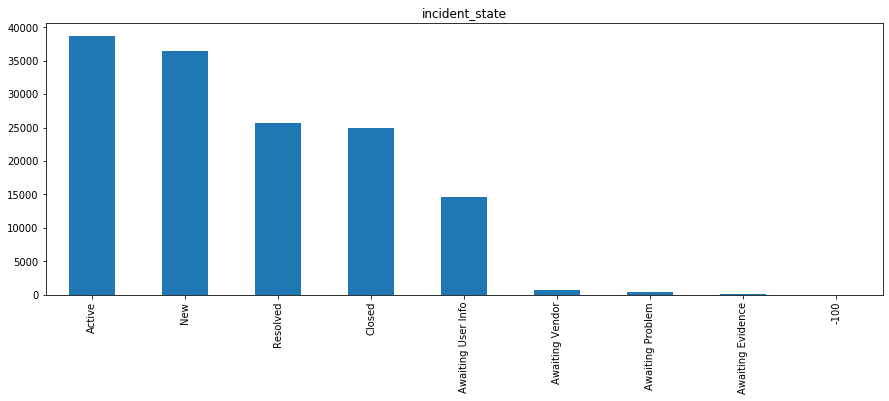

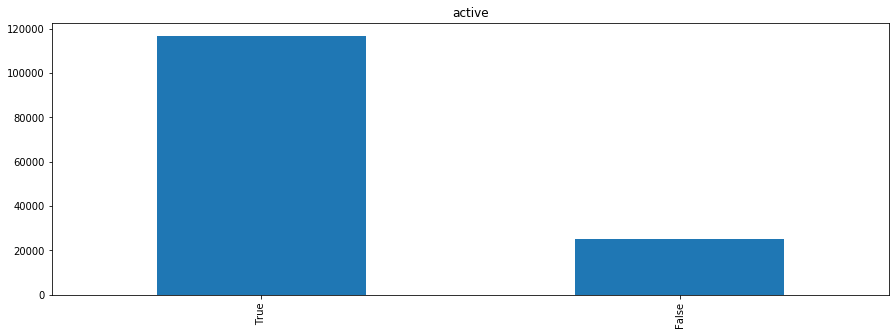

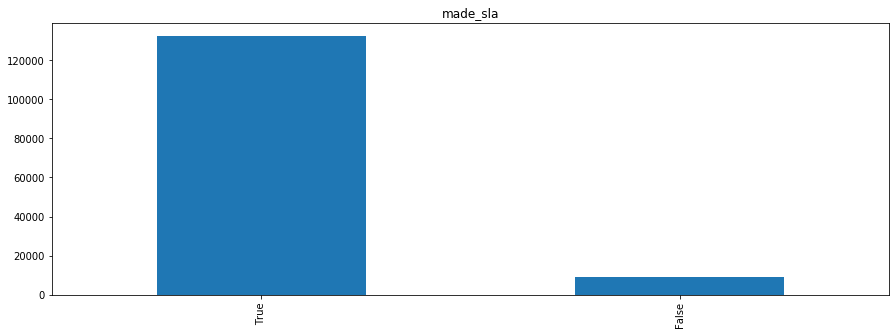

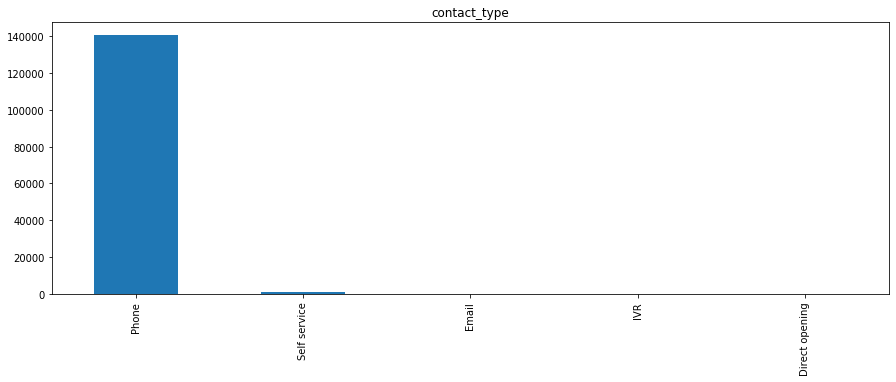

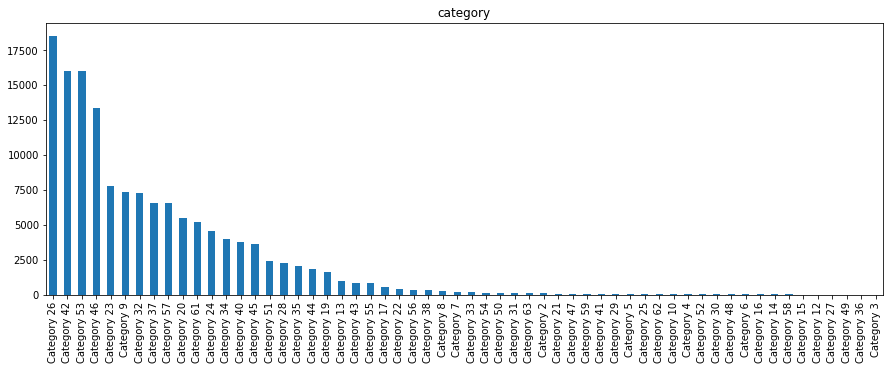

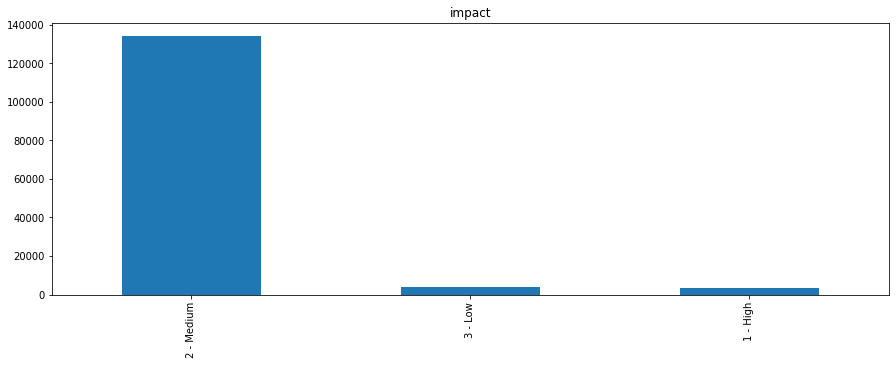

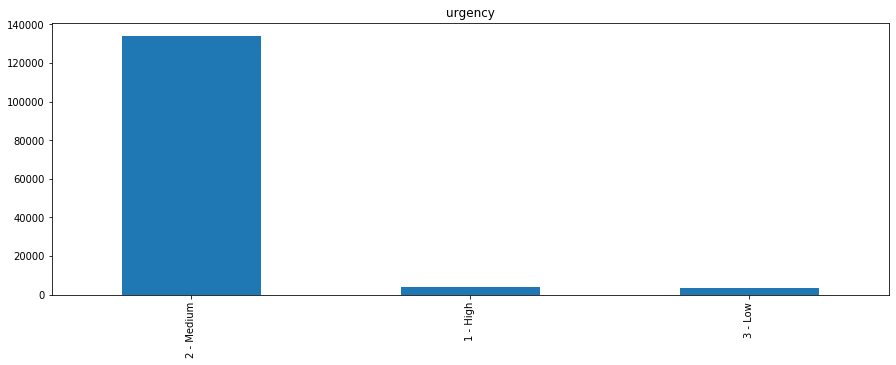

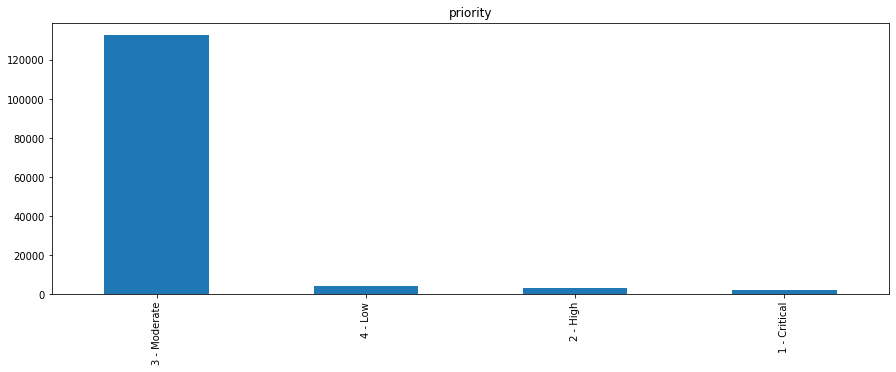

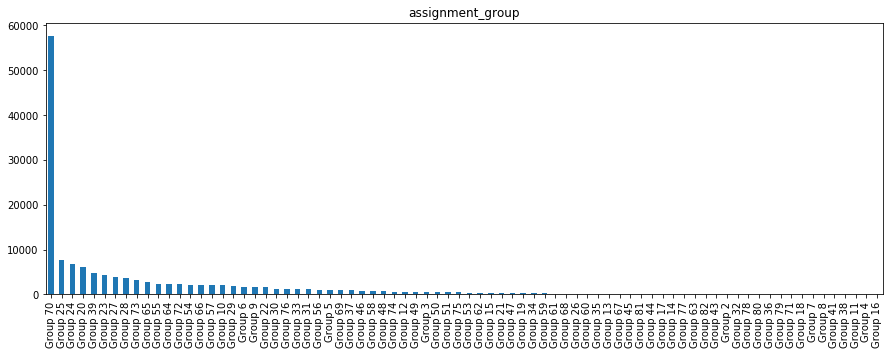

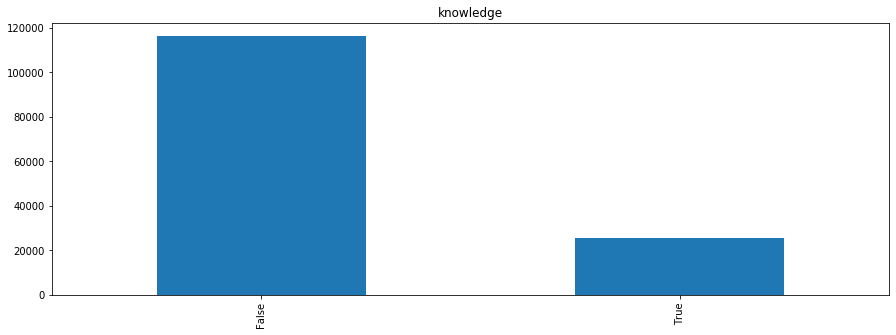

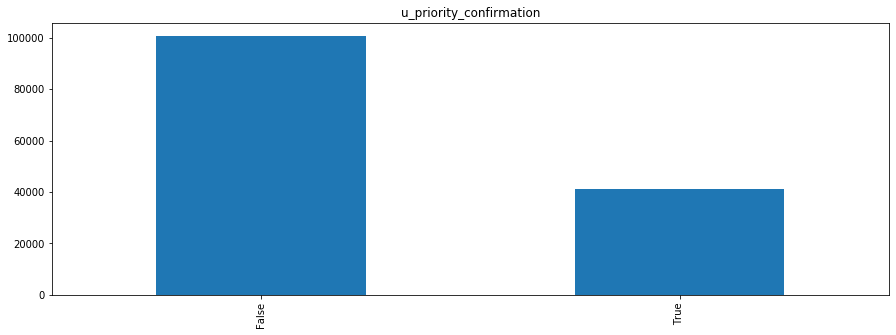

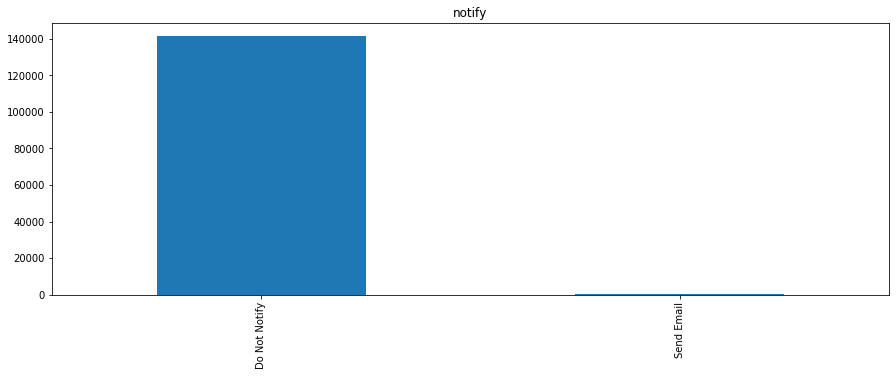

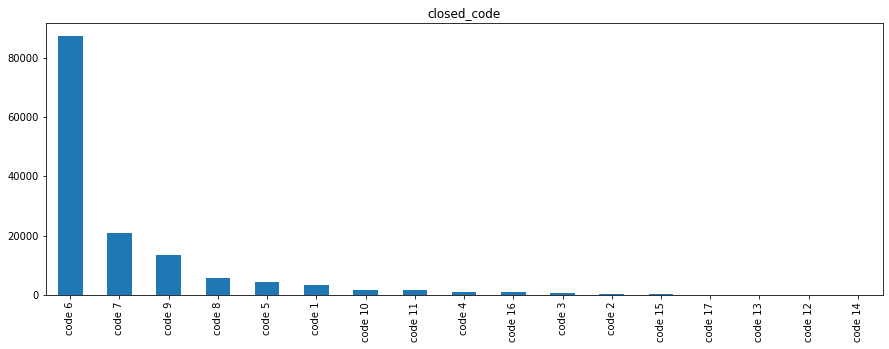

In [175]:
# lets check percentage of categories 

for feat in feat_category:
    data1[feat].value_counts().plot("bar", title=feat, figsize=(15,5))
    plt.show()

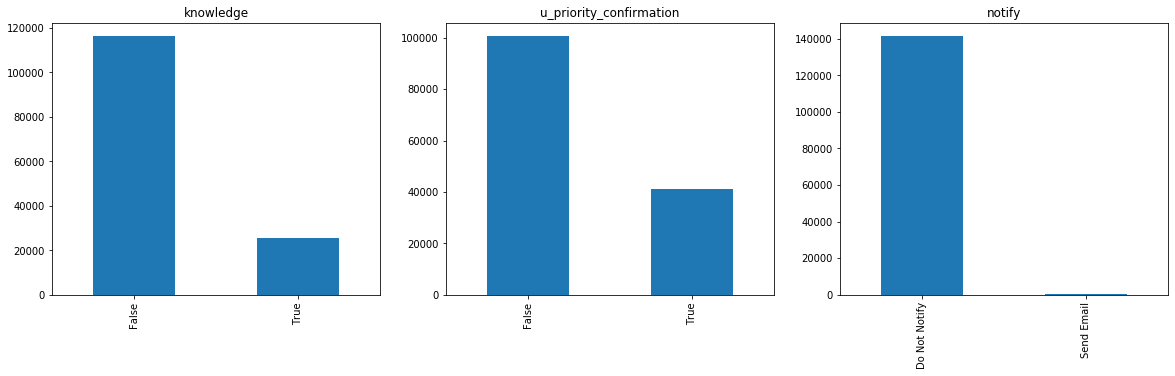

In [338]:
d = ['knowledge', 'u_priority_confirmation', 'notify']

fig, ax = plt.subplots(1,3, figsize=(20,5))

for _ in range(3):
    data1[d[_]].value_counts().plot(kind='bar', title=d[_], ax=ax[_])
    

#### number:

In [176]:
feat_category = data1[feat_cat].nunique()[data1[feat_cat].nunique()<=600].index.tolist()
feat_others = data1[feat_cat].nunique()[data1[feat_cat].nunique()>600].index.tolist()

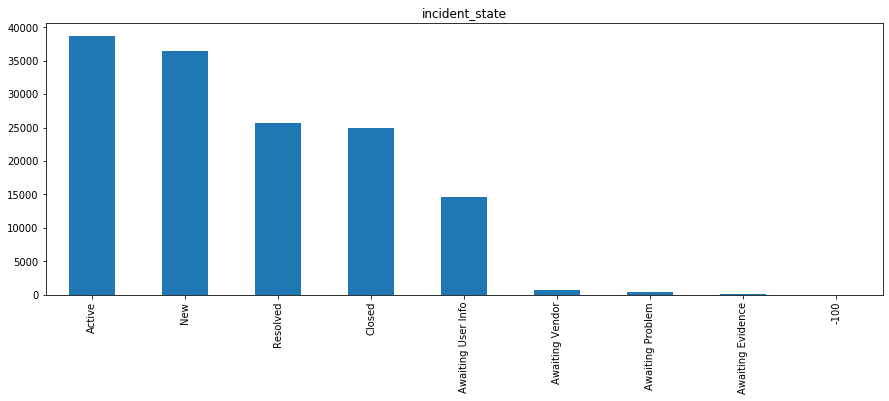

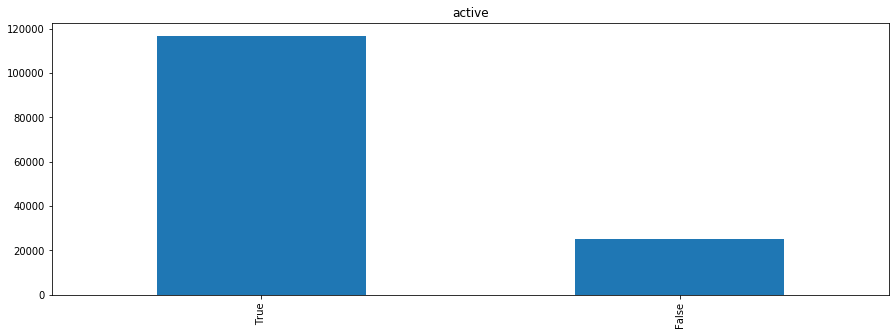

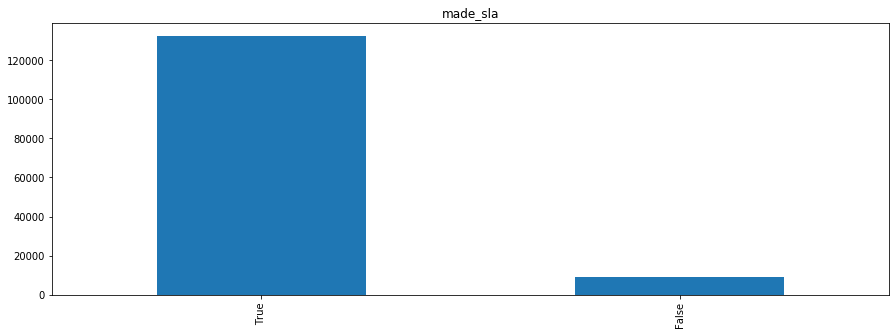

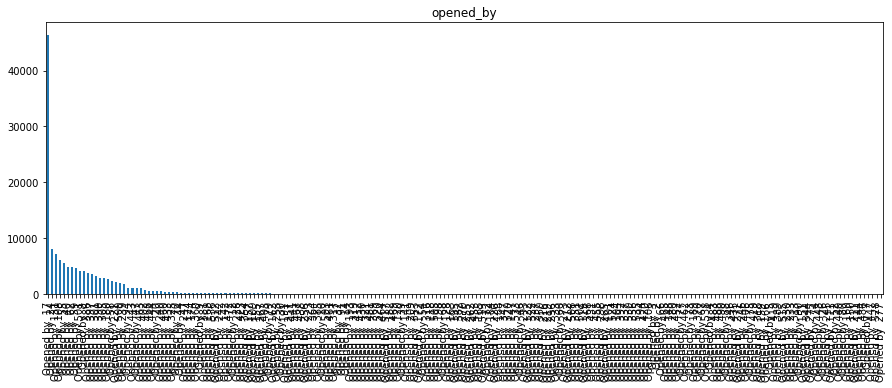

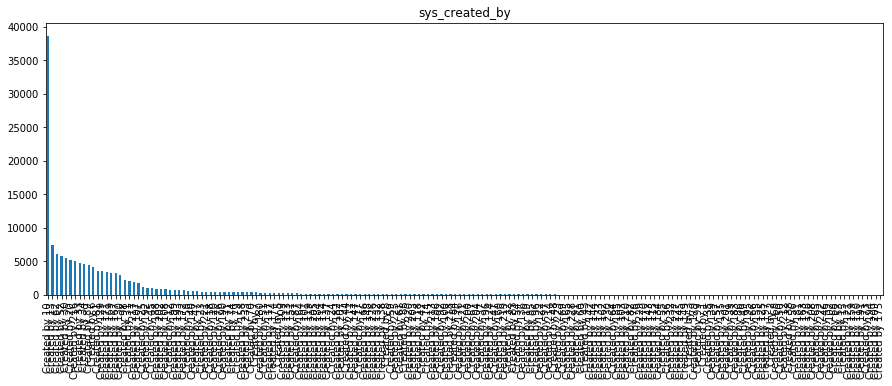

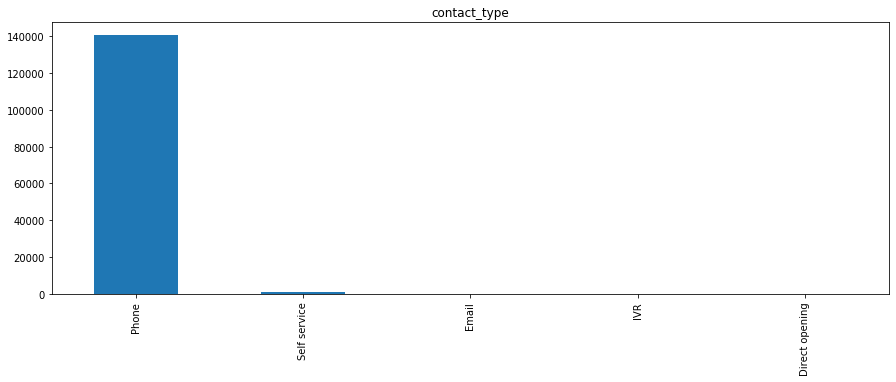

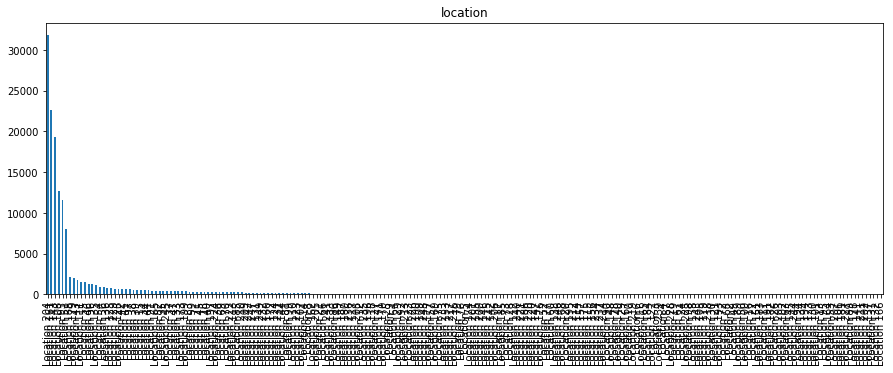

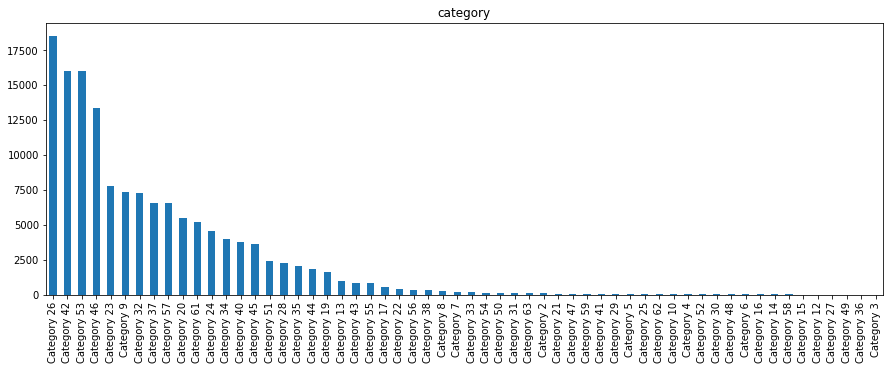

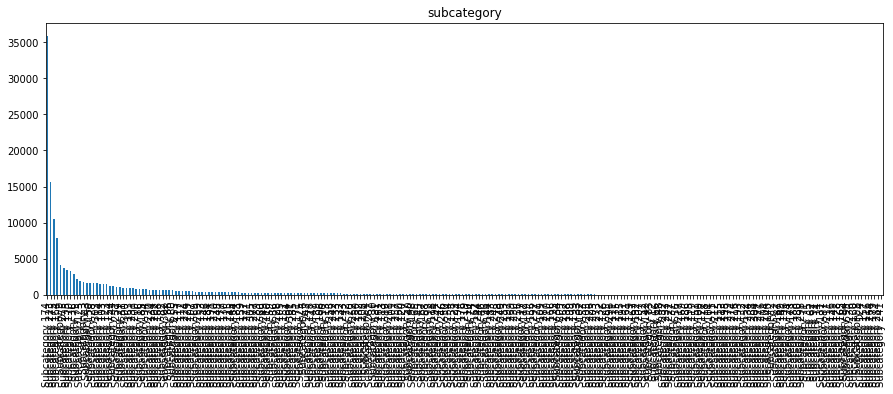

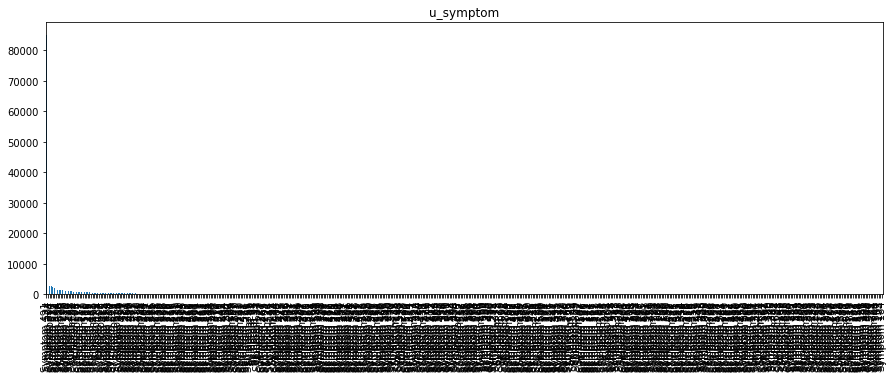

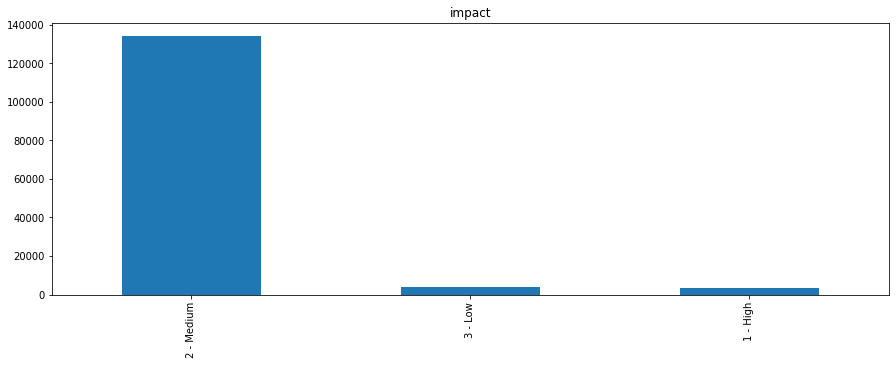

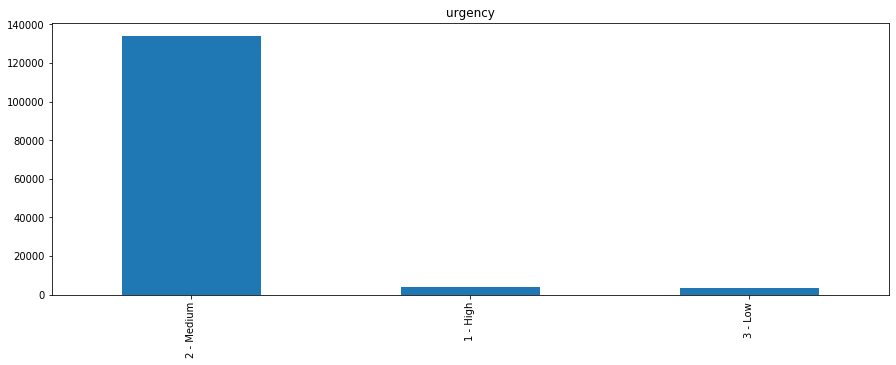

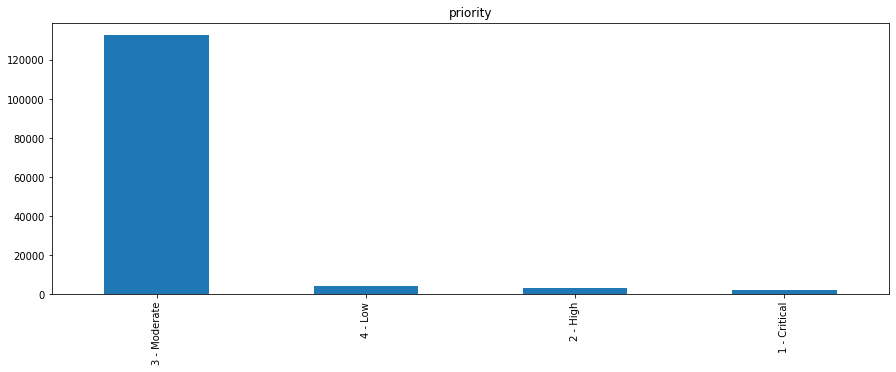

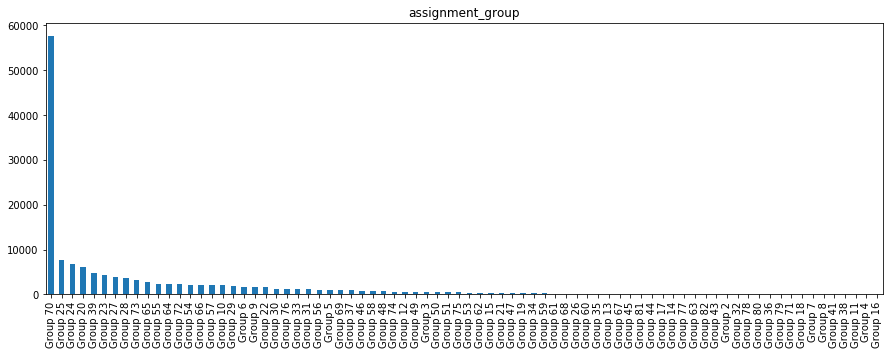

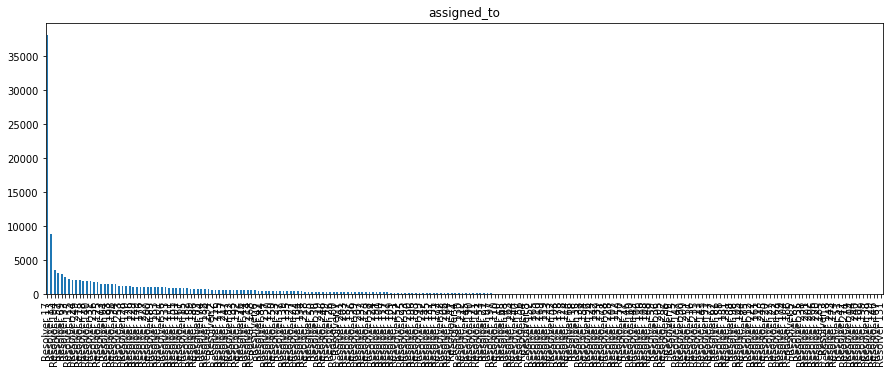

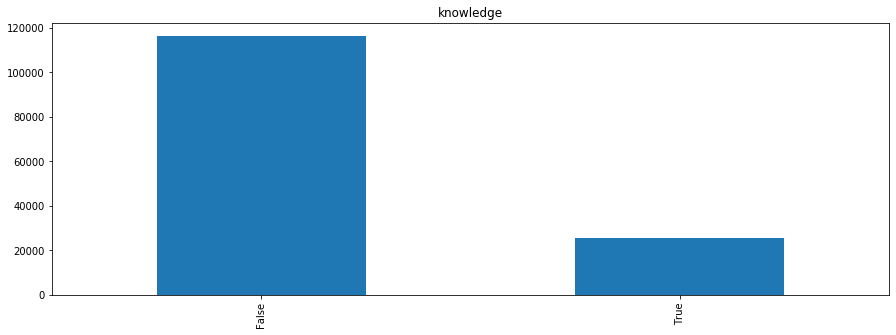

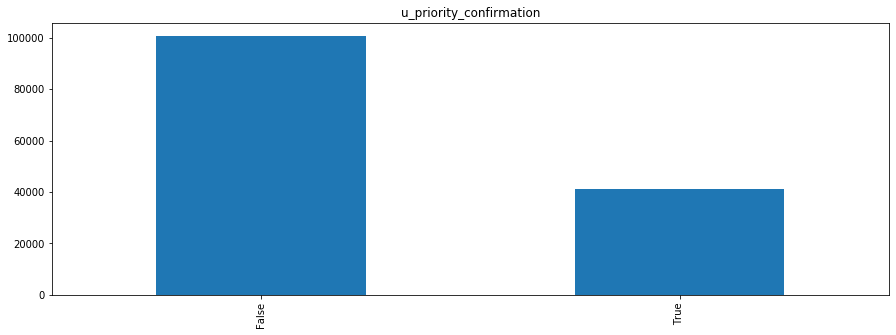

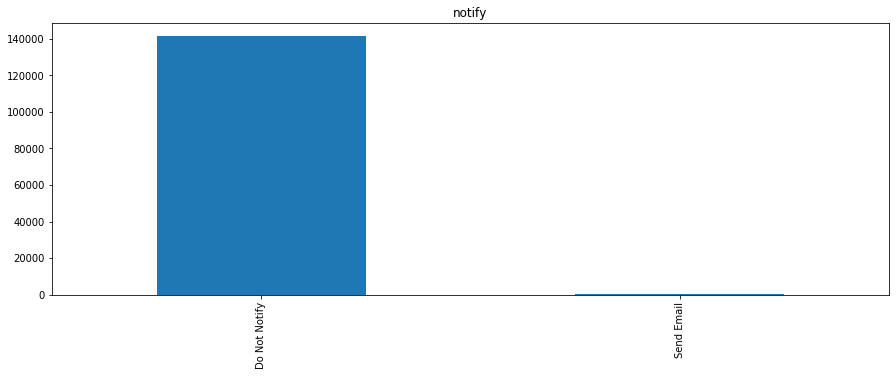

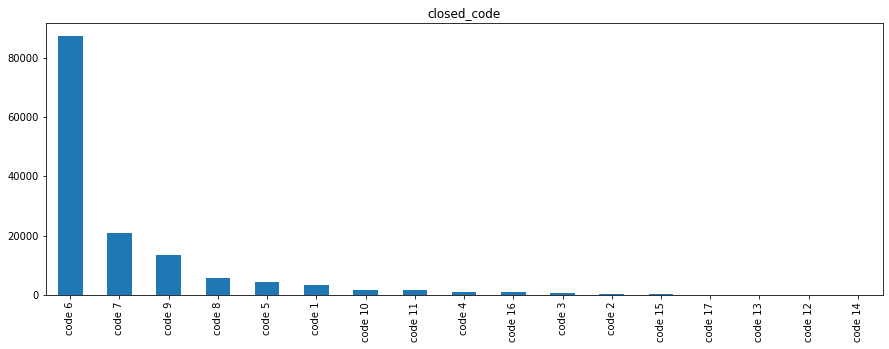

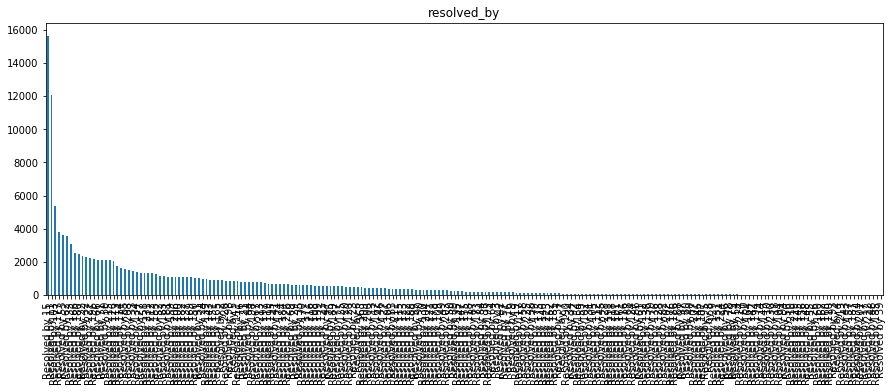

In [177]:
# lets check percentage of categories 

for feat in feat_category:
    data1[feat].value_counts().plot("bar", title=feat, figsize=(15,5))
    plt.show()

**Inference:**
    - `incident_state` : we have 9 different states of incident
    - `active` : we have True / False
    - `opened_by`, `sys_created_by`: 
    
    

## incident_state

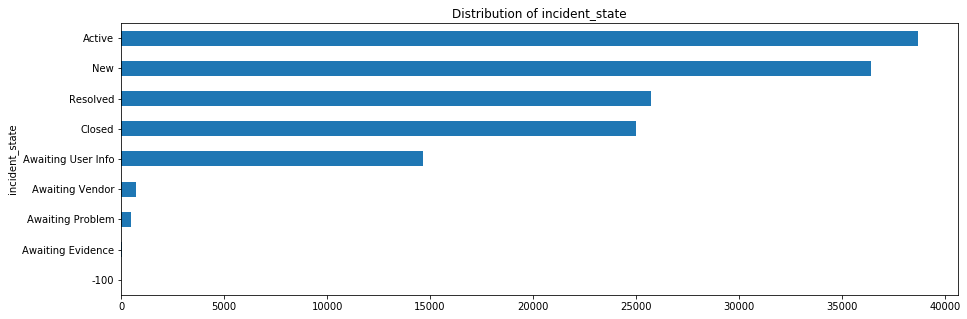

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [341]:
# checking different incidents
data1.groupby('incident_state') \
    .count()['number'] .sort_values(ascending=True)\
    .plot(kind='barh',
          title='Distribution of incident_state',
          figsize=(15, 5))
plt.show()
data1['incident_state'].value_counts()

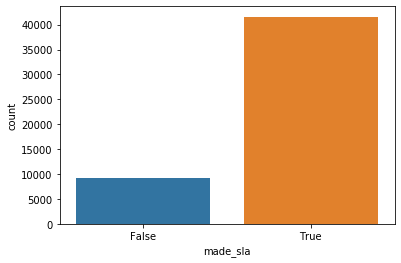

In [315]:
# checking which incidents made sla
made_s=data1[(data1['incident_state']=='Closed')|(data1['incident_state']=='Resolved')]
sns.countplot(made_s['made_sla'])


**Inference:**
    Majority incidents which were in closed/resolved made_sla only few incidents did not make sla timeline.

### Checking what was the reopen count for incidents which did not make_sla

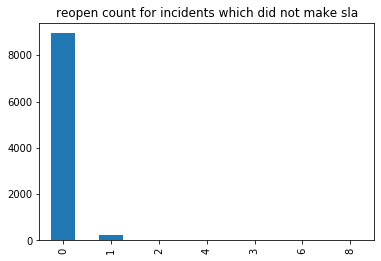

In [322]:
data1[data1.made_sla==False]['reopen_count'].value_counts().plot(kind='bar', title='reopen count for incidents which did not make sla')

**Inference:**
    We can see from plot we have a lot of incidents which did not make sla even if reopen count is 0.

#### closed_code

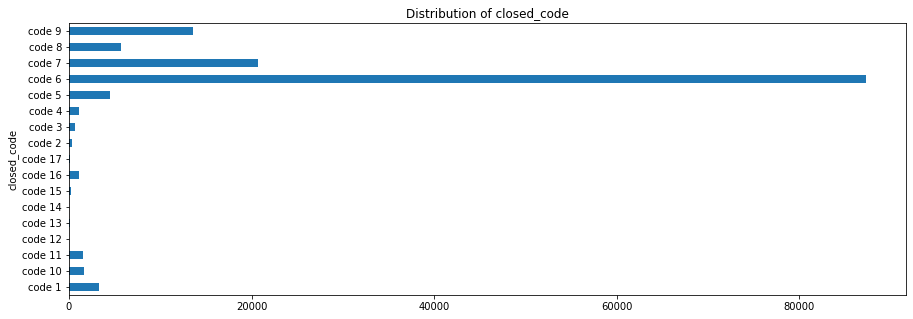

code 6     87297
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [194]:
# checking different incidents
data1.groupby('closed_code') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 5))
plt.show()
data1['closed_code'].value_counts()

In [179]:
data1.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'closed_code', 'resolved_by', 'resolved_at', 'closed_at',
       'predicted_closed_days', 'opened_month', 'opened_day', 'opened_hour',
       'opened_minute', 'sys_updated_month', 'sys_updated_day',
       'sys_updated_hour', 'sys_updated_minute'],
      dtype='object')

## Bivariate Analysis:

### made_sla vs predict_closed_days

Text(0.5, 1.0, 'made_sla vs predicted_closed_days')

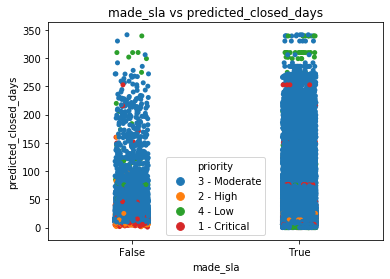

In [342]:
sns.stripplot(data1.made_sla, data1.predicted_closed_days, hue=data1.priority)
plt.title("made_sla vs predicted_closed_days")

**Inference:**
    We can see that whenever made_sla is True predicted_closed_days was lesser in comparision to when made_sla is False, 
    

In [187]:
# data1.groupby('closed_code').describe()

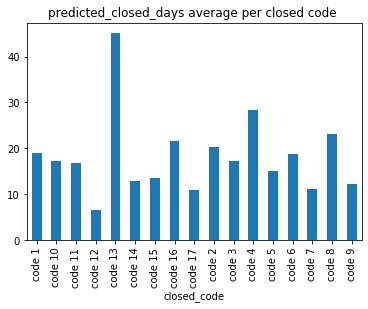

In [343]:
# checking which types of closed state seem to have less days taken to be closed
data1.groupby('closed_code').mean()['predicted_closed_days'].plot(kind='bar', title="predicted_closed_days average per closed code ")

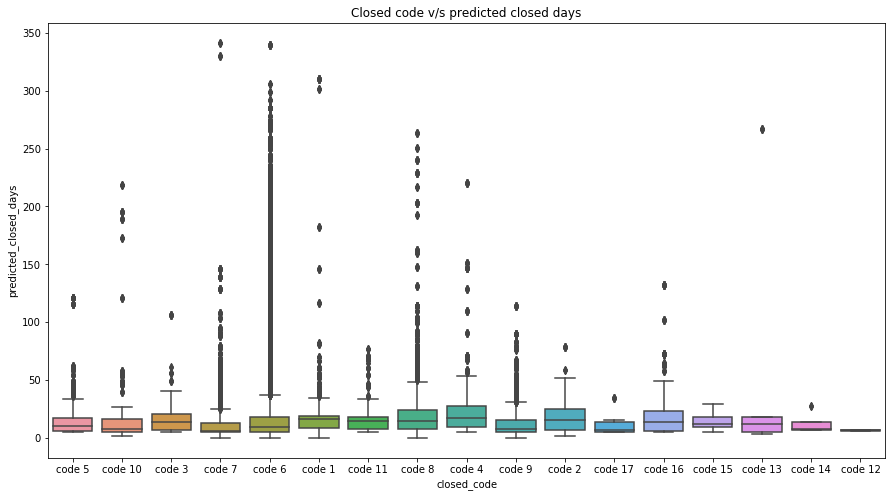

In [185]:
plt.figure(figsize=(15,8))
sns.boxplot(data1.closed_code, data1.predicted_closed_days)
plt.title("Closed code v/s predicted closed days")
plt.show()

**Inference:**
    - We can see code 12 hardly takes any number of days.
    - however code 13 seem to have the highest average
    - code 6 seems to have a lot of outliers sometimes it 

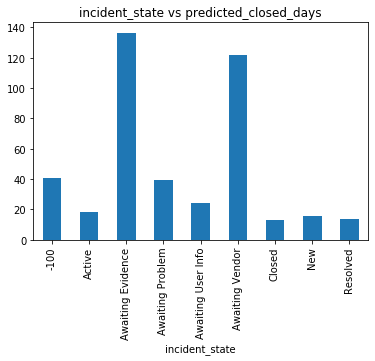

In [190]:
# checking distribution of incident state is that affects number of days it would take to predict closed_days
data1.groupby('incident_state').mean()['predicted_closed_days'].plot(kind='bar', title='incident_state vs predicted_closed_days')

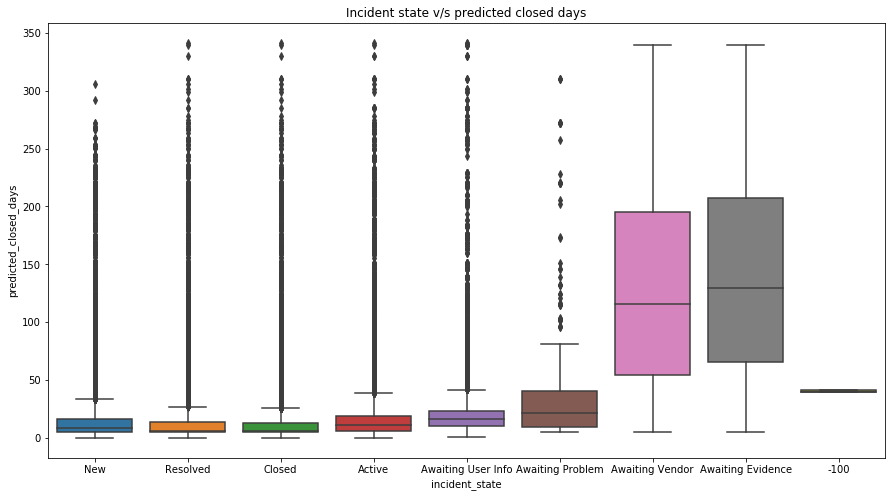

In [191]:
plt.figure(figsize=(15,8))
sns.boxplot(data1.incident_state, data1.predicted_closed_days)
plt.title("Incident state v/s predicted closed days")
plt.show()


**Inference:**
    We can see `Awaiting Vendor` and `Awaiting Evidence` seem to have higher number of days which also makes sense we we check the incidentstate

### Checking if category of incident's average time to get closed


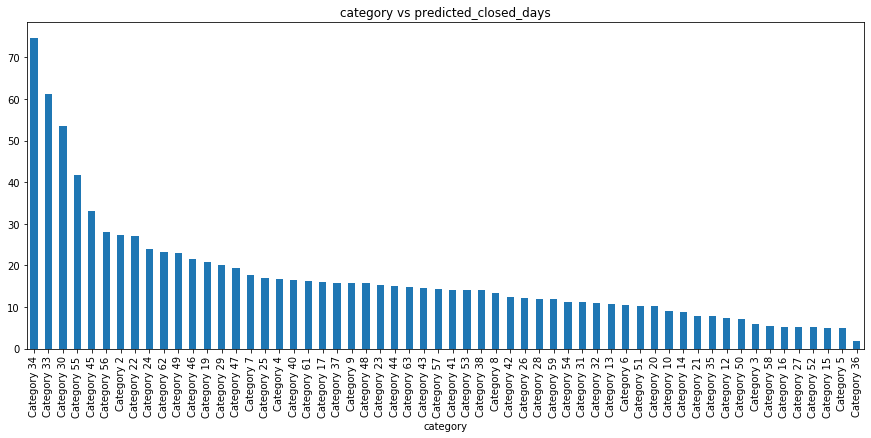

In [345]:
data1.groupby('category').mean()['predicted_closed_days'].sort_values(ascending=False).plot(kind='bar', title='category vs predicted_closed_days', figsize=(15,6))

**Inference:**
    We can see few categories significantly take way longer than few  other categories ime category 34 on average takes around 70 days to be closed whereas category 36 only takes about 2 days.

### checking number of days taken by category-subcategory wise number of days taken to close it

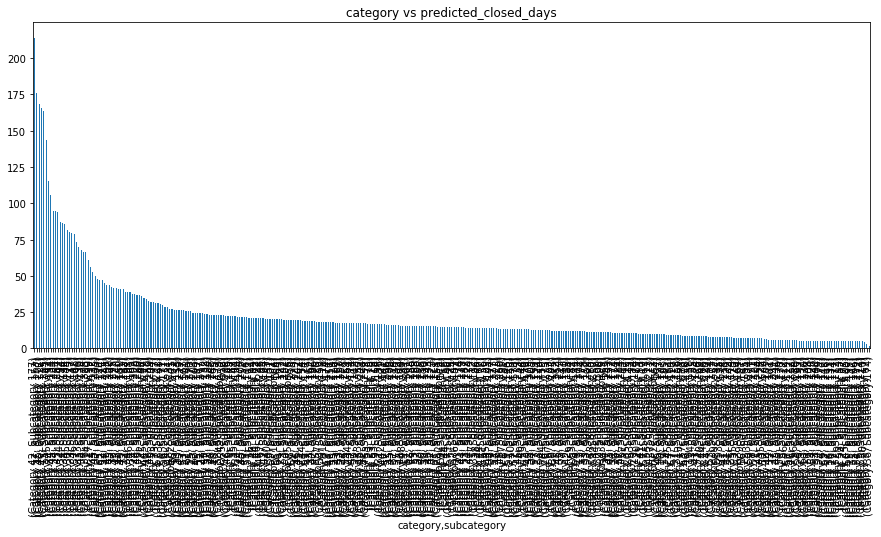

In [201]:
data1.groupby(['category', 'subcategory']).mean()['predicted_closed_days'].sort_values(ascending=False).plot(kind='bar', title='category vs predicted_closed_days', figsize=(15,6))

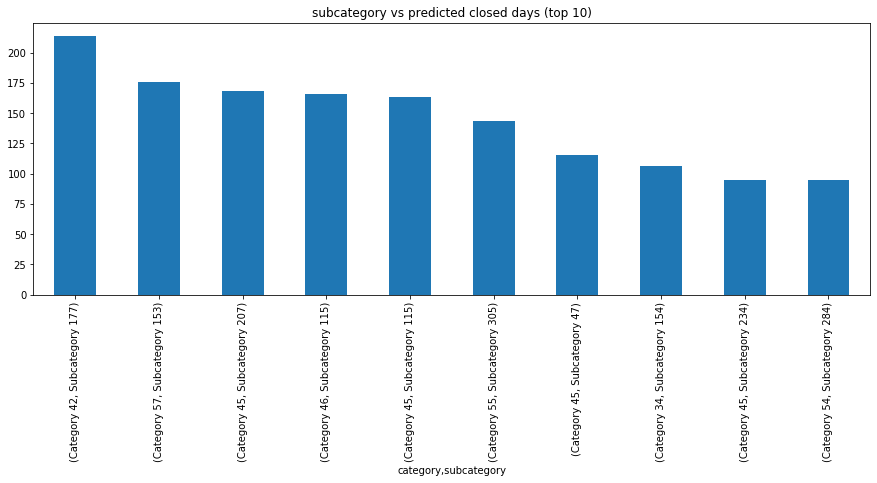

In [330]:
#top 10
data1.groupby(['category', 'subcategory']).mean()['predicted_closed_days'].sort_values(ascending=False).head(10).plot(kind='bar', title="subcategory vs predicted closed days (top 10)", figsize=(15,5))

category-subcategory which take least time to be closed


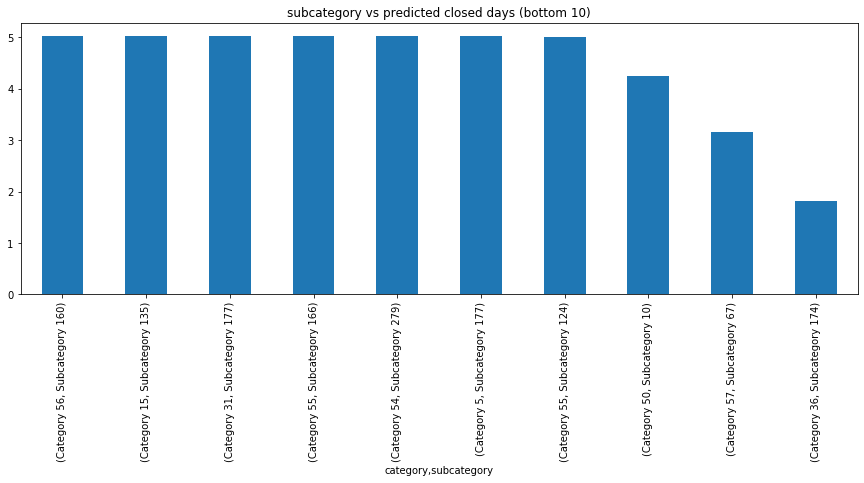

In [331]:
#bottom 10
print("category-subcategory which take least time to be closed")
data1.groupby(['category', 'subcategory']).mean()['predicted_closed_days'].sort_values(ascending=False).tail(10).plot(kind='bar', title="subcategory vs predicted closed days (bottom 10)", figsize=(15,5))

### Checking when incident_state was closed and then reopend

In [230]:
# if we check only those incidents whose status is closed
data_closed = data1[data1.incident_state=='Closed']

#hecking basic stats
data_closed.describe()

,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
count,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000,24985.000000
mean,0.616687,0.013368,2.318876,13.206713,3.937042,15.182870,11.887492,29.481249,4.315389,16.108705,13.619011,22.785031
std,0.749323,0.149116,1.147730,22.372705,0.965337,9.059017,4.100555,17.240071,1.158520,8.968103,4.056874,23.959393
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.414214,5.040972,3.000000,7.000000,9.000000,14.000000,4.000000,8.000000,11.000000,7.000000
50%,0.000000,0.000000,2.000000,6.084028,4.000000,15.000000,11.000000,30.000000,4.000000,17.000000,14.000000,7.000000
75%,1.000000,0.000000,2.828427,13.343750,5.000000,23.000000,15.000000,44.000000,5.000000,24.000000,17.000000,59.000000
max,5.196152,8.000000,11.357817,341.275694,12.000000,31.000000,23.000000,59.000000,12.000000,31.000000,23.000000,59.000000


In [231]:
# if we check only those incidents whose status is resolved
data_resolved = data1[data1.incident_state=='Resolved']

#hecking basic stats
data_resolved.describe()

,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
count,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000,25751.000000
mean,0.628349,0.019184,2.019736,13.401626,3.934566,15.173081,11.880859,29.485496,4.133082,15.685954,12.366782,29.763388
std,0.754815,0.199273,1.309488,22.419434,0.965557,9.054741,4.107405,17.256885,1.143134,8.939719,3.853556,17.218260
min,0.000000,0.000000,0.000000,0.001389,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,5.041667,3.000000,7.000000,9.000000,14.000000,3.000000,8.000000,10.000000,15.000000
50%,0.000000,0.000000,1.732051,6.146528,4.000000,15.000000,11.000000,30.000000,4.000000,16.000000,12.000000,30.000000
75%,1.000000,0.000000,2.645751,13.943056,5.000000,23.000000,15.000000,44.000000,5.000000,23.000000,15.000000,44.000000
max,5.196152,8.000000,11.313708,341.275694,12.000000,31.000000,23.000000,59.000000,12.000000,31.000000,23.000000,59.000000


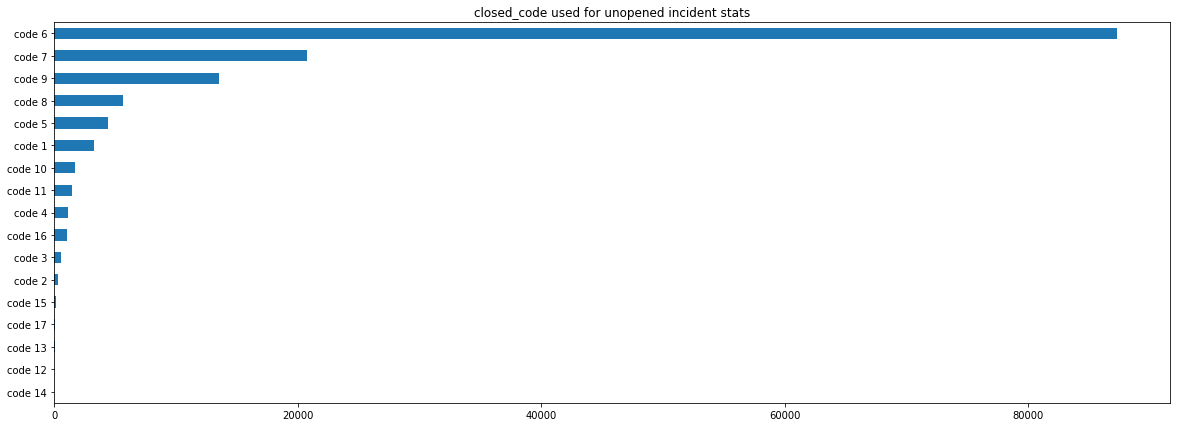

In [347]:
# Checking different types of closed codes
data1.closed_code.value_counts().sort_values(ascending=True).plot("barh", figsize=(20,7), title="closed_code used for unopened incident stats")

**Inference:**
    `Code 6`, `Code 7` and `Code 9` seem to have the highest reasons as closed codes

In [233]:
# lets check what types of incidents were reopened
data_closed_reopen = data_closed[data_closed["reopen_count"]>0]



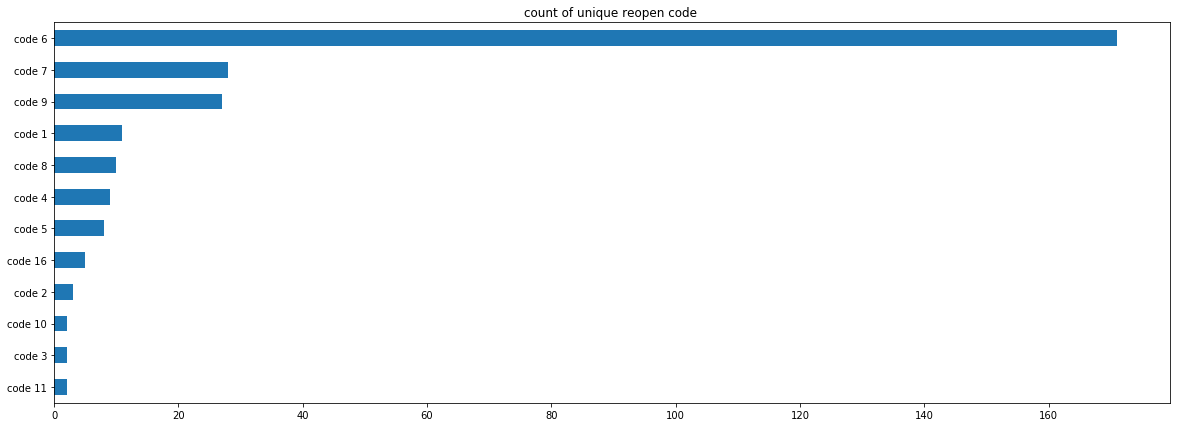

In [348]:
# checking closed codes for incidents which were reopened
# Checking different types of closed codes
data_closed_reopen.closed_code.value_counts().sort_values(ascending=True).plot("barh", figsize=(20,7), title="count of unique reopen code ")

**Inference:**
    We can see closed codes are similar but also few closed codes which were not used earlier now incidents go closed using these closed codes.

### Checking what type of incidents are meeting SLA's


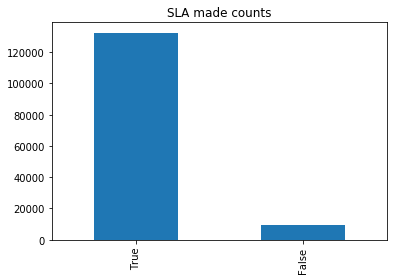

In [235]:
data1.made_sla.value_counts().plot(kind='bar', title="SLA made counts")

In [236]:
# checking what closed tickets made SLA
data_closed_sla = data_closed[data_closed["made_sla"] == 1]
data_closed_reopen_sla = data_closed_reopen[data_closed["made_sla"] == 1]



In [237]:
pd.crosstab(data_closed['made_sla'],data_closed['priority'])


priority,1 - Critical,2 - High,3 - Moderate,4 - Low
made_sla,,,,
False,265,406,8358,125
True,6,2,15171,652


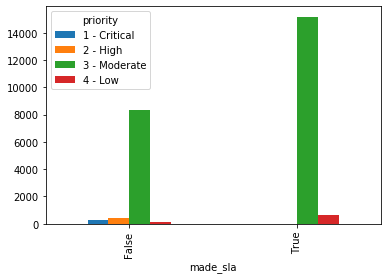

In [238]:
pd.crosstab(data_closed['made_sla'],data_closed['priority']).plot(kind='bar'. title="made_sla vs overview
                                                                  ")

In [239]:
pd.crosstab(data_closed_reopen['made_sla'],data_closed_reopen['priority'])

priority,2 - High,3 - Moderate,4 - Low
made_sla,,,
False,5,204,1
True,0,67,1


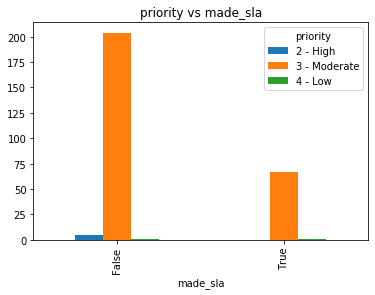

In [240]:
pd.crosstab(data_closed_reopen['made_sla'],data_closed_reopen['priority']).plot(kind='bar', title='priority vs made_sla')

### Checking if time taken to close depends on resolved_by 

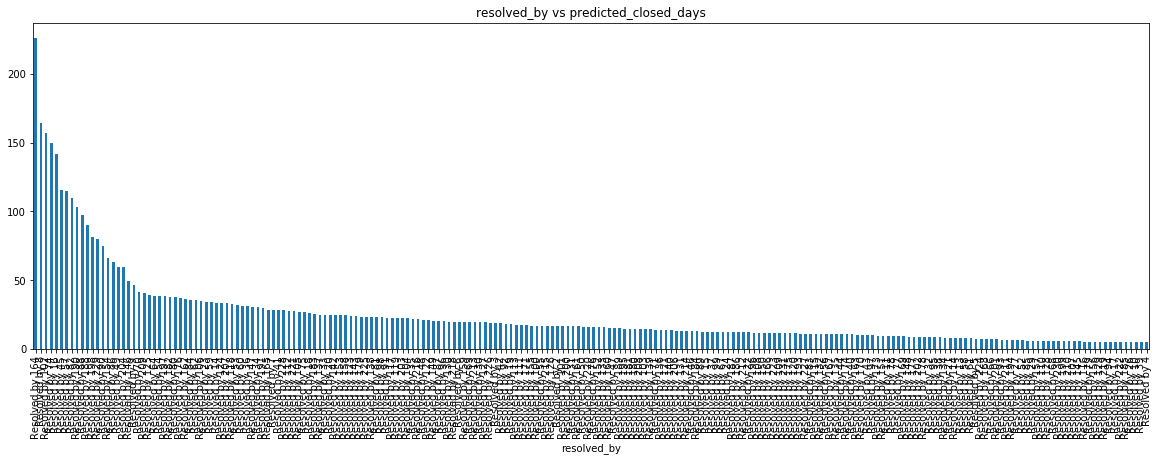

In [207]:
data1.groupby('resolved_by').mean()['predicted_closed_days'].sort_values(ascending=False).plot(kind='bar', title='resolved_by vs predicted_closed_days', figsize=(20,6))

In [208]:
# top 10
data1.groupby('resolved_by').mean()['predicted_closed_days'].sort_values(ascending=False).head(10)

resolved_by
Resolved by 164    225.796814
Resolved by 8      164.512500
Resolved by 102    156.894838
Resolved by 74     149.736806
Resolved by 16     141.427315
Resolved by 45     115.303034
Resolved by 57     114.909946
Resolved by 82     110.005295
Resolved by 190    103.340081
Resolved by 88      97.217728
Name: predicted_closed_days, dtype: float64

In [209]:
# bottom 10
data1.groupby('resolved_by').mean()['predicted_closed_days'].sort_values(ascending=False).tail(10)

resolved_by
Resolved by 129    5.070833
Resolved by 219    5.070833
Resolved by 94     5.057799
Resolved by 17     5.056944
Resolved by 222    5.040278
Resolved by 185    5.029861
Resolved by 26     5.026587
Resolved by 10     5.021389
Resolved by 39     5.018056
Resolved by 4      5.007639
Name: predicted_closed_days, dtype: float64

**Inference:**
    We can see that few resolved by id like 164 takes too long to close case like 245 days whereas most of them have average of 5 days approximately.

### Checking if any month had more number of incidents

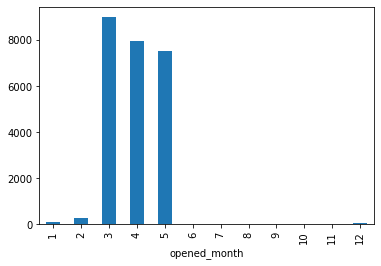

In [218]:
data1.groupby(['opened_month'])['number'].nunique().plot(kind='bar')

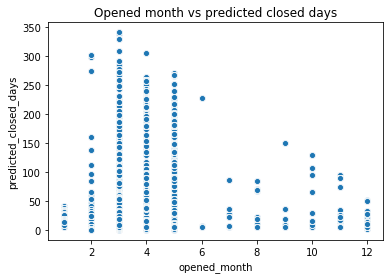

In [335]:
plt.title("Opened month vs predicted closed days")
sns.scatterplot(data1.opened_month, data1.predicted_closed_days)

**Inference:**
    - We can see have majority of incidents opened in the month of march-may i.e 1st half of the year . also we can see took longer time to close in initial half of year and later part we have lesser data points which took lesser time to be closed and also made SLA.

### checking if priority vs numer of days it took to close

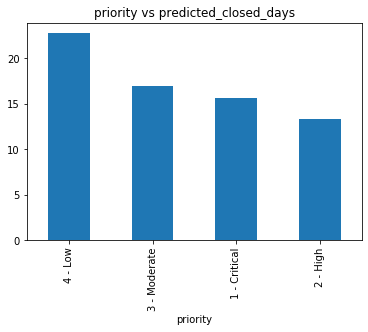

In [349]:
data1.groupby('priority')['predicted_closed_days'].mean().sort_values(ascending=False).plot(kind='bar', title="priority vs predicted_closed_days")

**Inference:**
    We can see highest priority incidents have least time taken to close days, and max number days for low priority.

### checking if impact vs numer of days it took to close

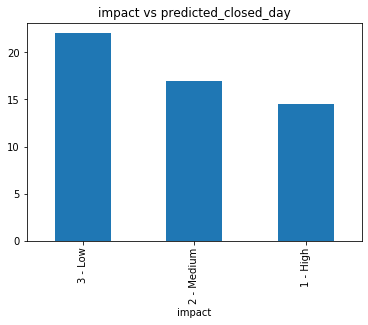

In [350]:
data1.groupby('impact')['predicted_closed_days'].mean().sort_values(ascending=False).plot(kind='bar', title='impact vs predicted_closed_day')

**Inference:**
    We can see highest impact incidents have least time taken to close days, and max number days for low priority.

### Checking if SLA_Made vs 

In [227]:
pd.crosstab(data1.made_sla, data1.incident_state)

incident_state,-100,Active,Awaiting Evidence,Awaiting Problem,Awaiting User Info,Awaiting Vendor,Closed,New,Resolved
made_sla,,,,,,,,,
False,0,28,0,1,20,2,9154,0,10
True,5,38688,38,460,14622,705,15831,36407,25741


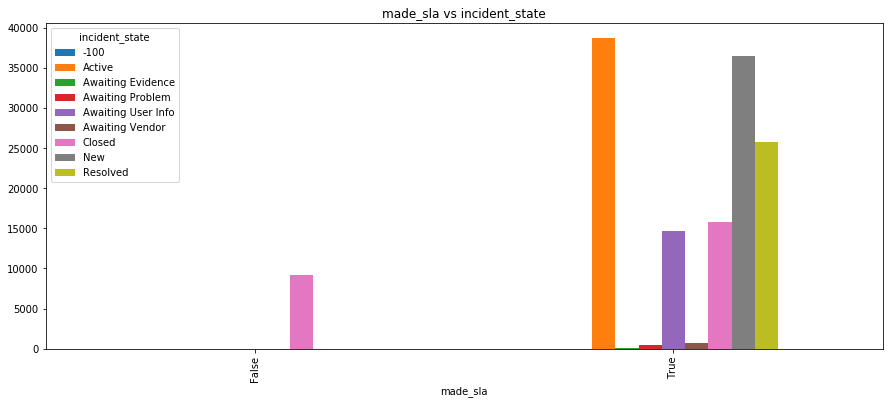

In [241]:
pd.crosstab(data1.made_sla, data1.incident_state).plot(kind='bar', figsize=(15,6), title='made_sla vs incident_state')

In [ ]:
**Inference:**
    

## Preparing data for modelling:

In [242]:
# filtering data for unresolved and not closed incidents

data2 = data1[(data1.incident_state!='Resolved')&(data1.incident_state!='Closed')]
data2 = data2.drop(['opened_at', 'sys_updated_at', 'resolved_at', 'closed_code', 'closed_at'], axis=1)

data2 = data2.reset_index()

In [243]:
feat_cat = data2.select_dtypes(['object','bool'])
feat_num = data2.select_dtypes(np.number)


In [244]:

feat_cat.head(2)

,number,incident_state,active,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,contact_type,location,...,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by
0,INC0000045,New,True,True,Caller 2403,Opened by 8,Created by 6,Updated by 21,Phone,Location 143,...,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,Resolved by 149
1,INC0000047,New,True,True,Caller 2403,Opened by 397,Created by 171,Updated by 746,Phone,Location 165,...,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,Resolved by 81


In [245]:
feat_num.head(2)

,index,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,0.0,0,0.0,5.447222,2,29,1,16,2,29,1,23
1,4,0.0,0,0.0,6.222222,2,29,4,40,2,29,4,57


In [246]:
data2

,index,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,...,resolved_by,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,INC0000045,New,True,0.000000,0,0.000000,True,Caller 2403,Opened by 8,...,Resolved by 149,5.447222,2,29,1,16,2,29,1,23
1,4,INC0000047,New,True,0.000000,0,0.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,4,57
2,5,INC0000047,Active,True,1.000000,0,1.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,5,30
3,6,INC0000047,Active,True,1.000000,0,1.414214,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,5,33
4,7,INC0000047,Active,True,1.000000,0,1.732051,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,11,31
5,8,INC0000047,Active,True,1.000000,0,2.000000,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,2,29,11,32
6,9,INC0000047,Active,True,1.000000,0,2.236068,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,3,1,9,14
7,10,INC0000047,Awaiting User Info,True,1.000000,0,2.449490,True,Caller 2403,Opened by 397,...,Resolved by 81,6.222222,2,29,4,40,3,1,9,14
8,13,INC0000057,New,True,0.000000,0,0.000000,True,Caller 4416,Opened by 8,...,Resolved by 5,5.868056,2,29,6,10,2,29,6,26
9,14,INC0000057,New,True,0.000000,0,1.000000,True,Caller 4416,Opened by 8,...,Resolved by 5,5.868056,2,29,6,10,2,29,6,38


In [247]:
# applying label encoding to ordinal data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feat_cat_encoded= feat_cat.apply(le.fit_transform)


In [248]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
feat_num_scaled = ss.fit_transform(feat_num)

feat_num_scaled = pd.DataFrame(feat_num_scaled, columns=feat_num.columns)

In [249]:
#combining the encoded and scaled the data
data_final = pd.concat([feat_cat_encoded, feat_num_scaled], axis=1)
data_final.head(10)

,number,incident_state,active,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,contact_type,location,...,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute
0,0,6,0,1,1411,200,151,95,3,42,...,-1.182459,-0.468391,-1.861618,1.610562,-2.753292,-0.780353,-1.800829,1.583411,-2.828802,-0.390750
1,1,6,0,1,1411,120,58,548,3,61,...,-1.182459,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-2.082122,1.573121
2,1,1,0,1,1411,120,58,95,3,61,...,-0.447187,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-1.833229,0.013577
3,1,1,0,1,1411,120,58,95,3,61,...,-0.142627,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-1.833229,0.186859
4,1,1,0,1,1411,120,58,596,3,61,...,0.091070,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-0.339870,0.071338
5,1,1,0,1,1411,120,58,509,3,61,...,0.288085,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-1.800829,1.583411,-0.339870,0.129099
6,1,1,0,1,1411,120,58,194,3,61,...,0.461659,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-0.878200,-1.578000,-0.837656,-0.910598
7,1,4,0,1,1411,120,58,194,3,61,...,0.618582,-0.441914,-1.861618,1.610562,-1.994846,0.610496,-0.878200,-1.578000,-0.837656,-0.910598
8,2,6,0,1,3432,200,58,95,3,102,...,-1.182459,-0.454014,-1.861618,1.610562,-1.489215,-1.128065,-1.800829,1.583411,-1.584336,-0.217467
9,2,6,0,1,3432,200,58,95,3,102,...,-0.447187,-0.454014,-1.861618,1.610562,-1.489215,-1.128065,-1.800829,1.583411,-1.584336,0.475664


### Multivariate analysis to check correaltion:

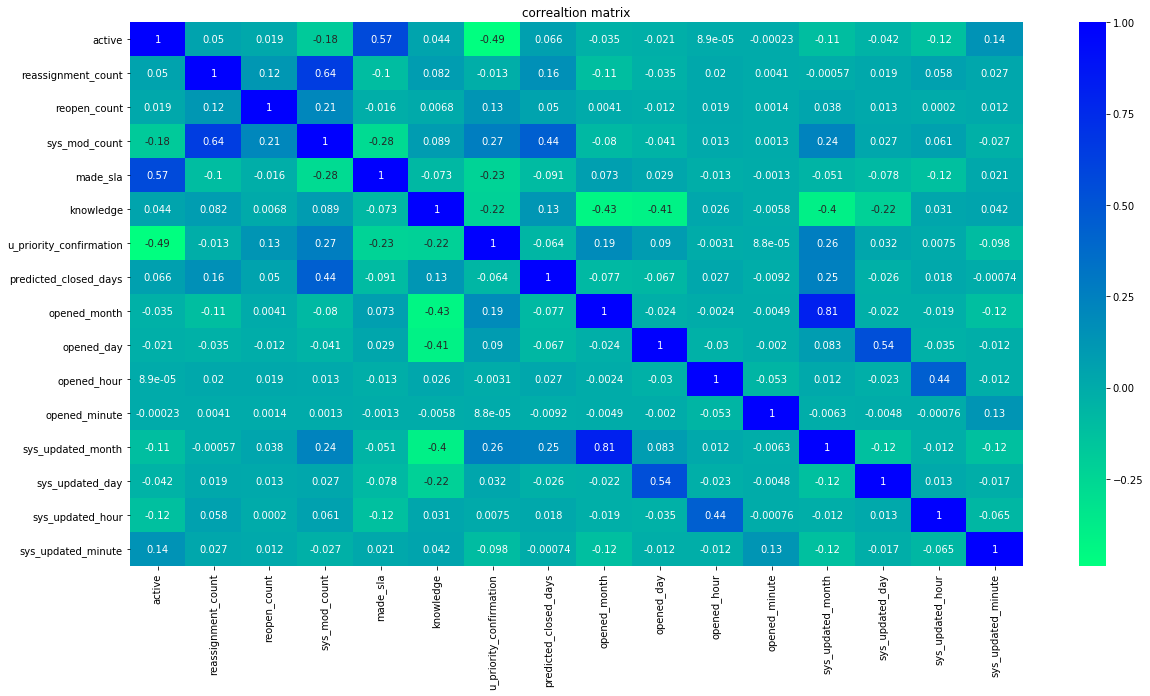

In [252]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(), cmap='winter_r', annot=True)
plt.title("correaltion matrix")
plt.show()

**Inference:**
    From the correlation matrix we can see that we have very few features indicating high correaltion with target however we have lost of independent features which are causing multicolinearity which needs to be dealt with.

### Builiding Base Model

In [254]:
X=data_final.drop(["predicted_closed_days"],axis=1)
y=data_final["predicted_closed_days"]

In [258]:
# type(X_constant), type(y), type(X)

In [259]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.354
Model:                               OLS   Adj. R-squared:                  0.354
Method:                    Least Squares   F-statistic:                     1511.
Date:                   Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                           10:53:47   Log-Likelihood:            -1.0920e+05
No. Observations:                  90976   AIC:                         2.185e+05
Df Residuals:                      90942   BIC:                         2.188e+05
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3572      0.174     -7.818      0.000      -1.697      -1.017
number                   3.502e-05   1.01e-05      3.477      0.001    1.53e-05    5.48e-05
incident_state              0.0252      0.001     20.347      0.000       0.023       0.028
active                  -1.168e-12   3.26e-13     -3.579      0.000   -1.81e-12   -5.29e-13
made_sla                   -0.2608      0.114     -2.279      0.023      -0.485      -0.037
caller_id                3.789e-06   1.83e-06      2.075      0.038     2.1e-07    7.37e-06
opened_by                1.763e-05   4.32e-05      0.408      0.683   -6.71e-05       0.000
sys_created_by             -0.0001   4.49e-05     -3.178      0.001      -0.000   -5.46e-05
sys_updated_by          -2.792e-05   1.17e-05     -2.388      0.017   -5.08e-05      -5e-06
contact_type                0.2794      0.027     10.312      0.000       0.226       0.332
location                 1.132e-05   4.18e-05      0.271      0.786   -7.05e-05    9.32e-05
category                   -0.0004      0.000     -1.921      0.055      -0.001    7.29e-06
subcategory                -0.0002   4.24e-05     -4.974      0.000      -0.000      -0.000
u_symptom               -1.866e-05   2.35e-05     -0.794      0.427   -6.47e-05    2.74e-05
impact                     -0.0036      0.026     -0.141      0.888      -0.054       0.047
urgency                    -0.0677      0.026     -2.608      0.009      -0.119      -0.017
priority                    0.1458      0.026      5.623      0.000       0.095       0.197
assignment_group            0.0007      0.000      5.475      0.000       0.000       0.001
assigned_to                -0.0001   6.48e-05     -1.719      0.086      -0.000    1.56e-05
knowledge                   0.0931      0.015      6.019      0.000       0.063       0.123
u_priority_confirmation     0.0270      0.025      1.089      0.276      -0.022       0.076
notify                      0.4849      0.129      3.750      0.000       0.232       0.738
resolved_by                 0.0013   5.85e-05     22.562      0.000       0.001       0.001
index                      -0.3694      0.071     -5.179      0.000      -0.509      -0.230
reassignment_count         -0.1172      0.004    -28.816      0.000      -0.125      -0.109
reopen_count               -0.0346      0.004     -9.765      0.000      -0.042      -0.028
sys_mod_count               0.2179      0.005     42.784      0.000       0.208       0.228
opened_month               -0.7972      0.008    -94.039      0.000      -0.814      -0.781
opened_day                 -0.2328      0.005    -50.320      0.000      -0.242      -0.224
opened_hour                -0.0001      0.003     -0.046      0.963      -0.006       0.006
opened_minute 

**Inference:**
    - the data has high multicolinearity 

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=X.columns.tolist()
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# pd.DataFrame({"vif":vif[1:]},index=X.columns).sort_values(ascending=False)


In [262]:
vif.sort_values(by='vif',ascending=False)

,columns,vif
0,number,1485.314386
3,made_sla,1015.320814
8,contact_type,761.866051
22,index,490.390577
15,priority,373.865080
14,urgency,98.337874
13,impact,97.564047
26,opened_month,9.832678
12,u_symptom,9.239319
17,assigned_to,8.019851


In [263]:
inp1 = X.drop(['number', 'made_sla', 'priority', 'contact_type', 'impact', 'opened_month'], axis=1)


In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=inp1.columns.tolist()
vif['vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,columns,vif
10,urgency,13.647843
9,u_symptom,8.160576
12,assigned_to,7.620705
16,resolved_by,5.682685
7,category,5.015049
11,assignment_group,4.743338
17,index,4.265602
2,caller_id,3.888633
8,subcategory,3.732319
5,sys_updated_by,3.615124


In [265]:
# checking model after removing columns causing high multi-colinearity
X_constant=sm.add_constant(inp1)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.289
Model:                               OLS   Adj. R-squared:                  0.289
Method:                    Least Squares   F-statistic:                     1369.
Date:                   Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                           10:54:40   Log-Likelihood:            -1.1358e+05
No. Observations:                  90976   AIC:                         2.272e+05
Df Residuals:                      90948   BIC:                         2.275e+05
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4479      0.022    -20.606      0.000      -0.491      -0.405
incident_state              0.0362      0.001     28.069      0.000       0.034       0.039
active                    8.61e-15   7.67e-16     11.223      0.000    7.11e-15    1.01e-14
caller_id                4.592e-06   1.92e-06      2.398      0.017    8.38e-07    8.35e-06
opened_by                -4.63e-05   4.52e-05     -1.024      0.306      -0.000    4.23e-05
sys_created_by             -0.0001   4.69e-05     -2.136      0.033      -0.000   -8.25e-06
sys_updated_by           1.157e-05   1.23e-05      0.944      0.345   -1.25e-05    3.56e-05
location                 5.757e-05   4.38e-05      1.314      0.189   -2.83e-05       0.000
category                   -0.0007      0.000     -3.678      0.000      -0.001      -0.000
subcategory                -0.0003   4.45e-05     -6.352      0.000      -0.000      -0.000
u_symptom                4.371e-05   2.46e-05      1.774      0.076   -4.59e-06     9.2e-05
urgency                     0.1613      0.012     13.174      0.000       0.137       0.185
assignment_group            0.0011      0.000      8.550      0.000       0.001       0.001
assigned_to             -4.256e-05   6.79e-05     -0.627      0.531      -0.000    9.05e-05
knowledge                   0.0544      0.010      5.338      0.000       0.034       0.074
u_priority_confirmation     0.0224      0.025      0.879      0.379      -0.027       0.072
notify                     -0.0391      0.123     -0.317      0.751      -0.281       0.202
resolved_by                 0.0014   6.12e-05     23.606      0.000       0.001       0.002
index                      -0.4283      0.006    -73.787      0.000      -0.440      -0.417
reassignment_count         -0.2104      0.004    -50.882      0.000      -0.218      -0.202
reopen_count               -0.0495      0.004    -13.464      0.000      -0.057      -0.042
sys_mod_count               0.4399      0.005     93.044      0.000       0.431       0.449
opened_day                 -0.0048      0.004     -1.169      0.242      -0.013       0.003
opened_hour                 0.0139      0.003      4.407      0.000       0.008       0.020
opened_minute              -0.0063      0.003     -2.195      0.028      -0.012      -0.001
sys_updated_month           0.4616      0.005     90.366      0.000       0.452       0.472
sys_updated_day             0.1009      0.004     24.529      0.000       0.093       0.109
sys_updated_hour            0.0166      0.003      5.232      0.000       0.010       0.023
sys_updated_minute          0.0101      0.003      3.533      0.000       0.004       0.016
==============================================================================
Omnibus:                   

In [266]:
significant_features = ols_mod.pvalues[ols_mod.pvalues < 0.05].index
insignificant_features = ols_mod.pvalues[ols_mod.pvalues > 0.05].index.tolist()

In [267]:
insignificant_features

['opened_by',
 'sys_updated_by',
 'location',
 'u_symptom',
 'assigned_to',
 'u_priority_confirmation',
 'notify',
 'opened_day']

In [268]:
inp2 = inp1.drop(insignificant_features, axis=1)

In [269]:
# checking model after using columns with signifact features
X_constant=sm.add_constant(inp2)

ols = sm.OLS(y, X_constant)
ols_mod3 = ols.fit()
ols_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.289
Model:                               OLS   Adj. R-squared:                  0.289
Method:                    Least Squares   F-statistic:                     1945.
Date:                   Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                           10:54:41   Log-Likelihood:            -1.1358e+05
No. Observations:                  90976   AIC:                         2.272e+05
Df Residuals:                      90956   BIC:                         2.274e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4299      0.018    -23.628      0.000      -0.466      -0.394
incident_state         0.0363      0.001     28.216      0.000       0.034       0.039
active             -1.145e-14   4.81e-16    -23.809      0.000   -1.24e-14   -1.05e-14
caller_id           4.594e-06   1.91e-06      2.404      0.016    8.48e-07    8.34e-06
sys_created_by        -0.0001   4.57e-05     -2.550      0.011      -0.000    -2.7e-05
category              -0.0007      0.000     -3.633      0.000      -0.001      -0.000
subcategory           -0.0003   4.43e-05     -6.117      0.000      -0.000      -0.000
urgency                0.1608      0.012     13.396      0.000       0.137       0.184
assignment_group       0.0011      0.000      8.734      0.000       0.001       0.001
knowledge              0.0556      0.010      5.629      0.000       0.036       0.075
resolved_by            0.0014   4.71e-05     30.088      0.000       0.001       0.002
index                 -0.4282      0.006    -73.903      0.000      -0.440      -0.417
reassignment_count    -0.2100      0.004    -51.015      0.000      -0.218      -0.202
reopen_count          -0.0474      0.003    -16.407      0.000      -0.053      -0.042
sys_mod_count          0.4395      0.005     93.593      0.000       0.430       0.449
opened_hour            0.0142      0.003      4.506      0.000       0.008       0.020
opened_minute         -0.0063      0.003     -2.201      0.028      -0.012      -0.001
sys_updated_month      0.4616      0.005     90.471      0.000       0.452       0.472
sys_updated_day        0.0977      0.003     30.601      0.000       0.091       0.104
sys_updated_hour       0.0164      0.003      5.209      0.000       0.010       0.023
sys_updated_minute     0.0101      0.003      3.529      0.000       0.004       0.016
==============================================================================
Omnibus:                    90830.326   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5355308.577
Skew:                           4.967   Prob(JB):                         0.00
Kurtosis:                      39.250   Cond. No.                     1.27e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [270]:
from sklearn.ensemble import RandomForestRegressor

rfe = RandomForestRegressor(random_state=0)
rfe.fit(inp1, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

<BarContainer object of 28 artists>

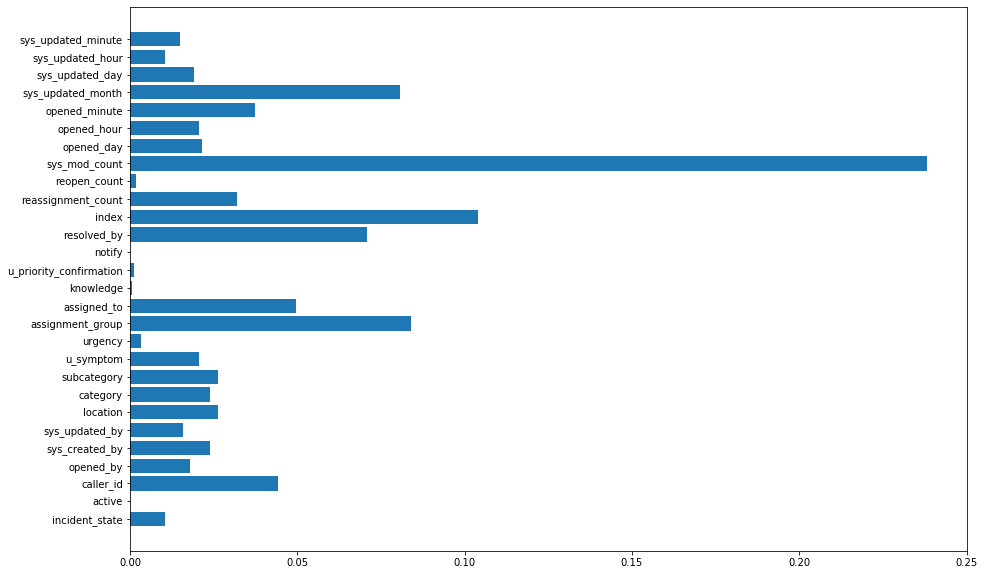

In [274]:
plt.figure(figsize=(15,10))
plt.barh(inp1.columns,rfe.feature_importances_)

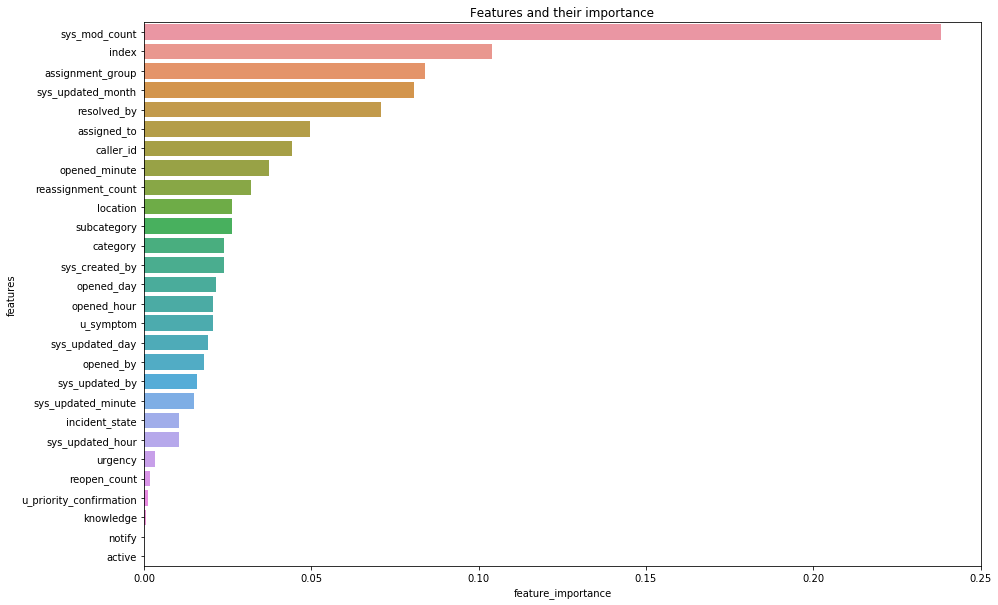

In [291]:
feat_imp = pd.DataFrame({'features':inp1.columns.tolist(),
             'feature_importance':rfe.feature_importances_}).sort_values(by='feature_importance', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot( 'feature_importance', 'features', data=feat_imp)
plt.title("Features and their importance")

plt.show()

## Evaluting the models

In [296]:
from sklearn.model_selection import train_test_split

In [298]:
# using input where we removed multicolinear features
xtrain, xtest, ytrain, ytest = train_test_split(inp1, y, test_size=0.3, random_state=0)

# build and train the model
rfe = RandomForestRegressor(random_state=0)
rfe.fit(xtrain, ytrain)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [301]:
#predict values
ypred_train = rfe.predict(xtrain)
ypred_test = rfe.predict(xtest)

#evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test))

rsquared_train = r2_score(ytrain, ypred_train)
rsquared_test = r2_score(ytest, ypred_test)

print(f"rsquared  - (Train) : {rsquared_train}")
print(f"root mean squared error - (Train) : {rmse_train}")


print(f"rsquared  - (Test) : {rsquared_test}")
print(f"root mean squared error - (Test) : {rmse_test}")

rsquared  - (Train) : 0.9472198558350515
root mean squared error - (Train) : 0.22893092904717394
rsquared  - (Test) : 0.7451106076919187
root mean squared error - (Test) : 0.508983113801036


**Inference:**
    From the trainig score we get tha model scored 94% whereas testing is 74% which is a huge variation indicating model is overfit, also rmse of train indicates their is a huge variation.